In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [3]:
df = pd.read_csv('data/inv_listing_1705')

df_1 = pd.read_csv('data/inv_listing_17051905')
df_2 = pd.read_csv('data/inv_listing_20052305')
df_3 = pd.read_csv('data/inv_listing_24052605')
df_4 = pd.read_csv('data/inv_listing_27052805')
df_5 = pd.read_csv('data/inv_listing_30053105')


In [4]:
df_sn = pd.read_csv('data/listing_snapshot_marchapril')
df_sn_1 = pd.read_csv('data/listing_snapshot_janfeb')
df_sn_2 = pd.read_csv('data/listing_snapshot_may')
df_sn_3 = pd.read_csv('data/listing_snapshot_novdec')
df_sn_4 = pd.read_csv('data/listing_snapshot_sepoct')
df_sn_5 = pd.read_csv('data/listing_snapshot_janapr2020')
df_sn_6 = pd.read_csv('data/listing_snapshot_mayaug2020')
#df_sn_7 = pd.read_csv('data/listing_snapshot_sepdec2019')

In [5]:
df = pd.concat([df, df_1, df_2, df_3, df_4, df_5], ignore_index=True)

In [6]:
df_snn = pd.concat([df_sn_4, df_sn_3, df_sn_1, df_sn, df_sn_2, df_sn_5, df_sn_6], ignore_index=True)

In [7]:
df_s = pd.read_csv('data/searches')
df_s1 = pd.read_csv('data/searches_sepdec2020')
df_s2 = pd.read_csv('data/searches_junaug2020')
df_s3 = pd.read_csv('data/searches_marmay2020')
#df_s4 = pd.read_csv('data/searches_sepdec2019')

In [8]:
df_s = pd.concat([df_s, df_s1, df_s2, df_s3], ignore_index=True)

In [9]:
min(df_snn.date), max(df_snn.date)

('2020-01-01', '2021-05-31')

In [10]:
min(df_s.date), max(df_s.date)

('2020-03-01', '2021-05-30')

In [11]:
df_s.head()

,Unnamed: 0,date,page_path,listings,make,model,page_views
0,0,2021-01-01,/de/auto/ac/16-80?typeKey=2&priceFrom=100,NaN,ac,16-80,2
1,1,2021-01-01,/de/auto/ac/16-80?typeKey=2&priceFrom=100&pric...,NaN,ac,16-80,4
2,2,2021-01-01,/de/auto/ac/16-80,NaN,ac,16-80,3
3,3,2021-01-01,/de/auto/ac/16-80?typeKey=2,NaN,ac,16-80,1
4,4,2021-01-01,/de/auto/ac/cobra,NaN,ac,cobra,11


In [12]:
df_ = df[pd.to_datetime(df.created_date)>=pd.to_datetime('2020-01-01')][['id', 'make_key', 'model_key','source',
                                                                         'inv_dealer_id','created_date', 'deactivation_date', 
                                                                         'mileage', 'horse_power', 'price', 'fuel_type']]

In [13]:
df_snn['leads_total'] = df_snn['no_of_message_leads'] + df_snn['no_of_ga_call_leads'] 

In [15]:
df_snn['action_year'] = df_snn.date.astype(str).str.slice(0,4)
df_snn['action_month'] = df_snn.date.astype(str).str.slice(5,7)

In [17]:
df_['created_year'] = df_.created_date.astype(str).str.slice(0,4)
df_['created_month'] = df_.created_date.astype(str).str.slice(5,7)

In [19]:
dfa = df_snn.groupby(['action_year', 'action_month','original_listing_id'])['leads_total', 'no_of_ga_unique_pdp_views'].sum().reset_index()



In [28]:
df_m = pd.merge(dfa, df_, left_on=['action_year', 'action_month', 'original_listing_id'], right_on=['created_year', 'created_month', 'id'])

In [31]:
df_a_g = df_m[df_m.model_key=='golf'].groupby(['action_year', 'action_month'])['leads_total', 'no_of_ga_unique_pdp_views'].sum().reset_index()

In [32]:
df_i_g = df_[df_.model_key=='golf'].groupby(['created_year', 'created_month'])['id'].count().reset_index()

In [35]:
df_s['year'] = df_s.date.astype(str).str.slice(0,4)
df_s['month'] = df_s.date.astype(str).str.slice(5,7)
df_s_g = df_s[df_s.model=='golf'].groupby(['year', 'month'])['page_views'].sum().reset_index()

In [36]:
df_s_g

,year,month,page_views
0,2020,03,100983
1,2020,04,112995
2,2020,05,123829
3,2020,06,127801
4,2020,07,123892
5,2020,08,143691
6,2020,09,135326
7,2020,10,142308
8,2020,11,178314
9,2020,12,150944


In [37]:
mm = pd.merge(df_a_g, df_i_g, left_on=['action_year', 'action_month'], right_on=['created_year', 'created_month'])
mmm = pd.merge(mm, df_s_g, left_on=['action_year', 'action_month'], right_on=['year', 'month'])


In [41]:
mmm = mmm.drop(columns=['action_year', 'action_month', 'created_year', 'created_month'], axis = 1)

In [43]:
mmm['leads_inv_golf'] = mmm.leads_total / mmm.id
mmm['leads_views_golf'] = mmm.leads_total/ mmm.no_of_ga_unique_pdp_views
mmm['views_searches_golf'] = mmm.no_of_ga_unique_pdp_views/mmm.page_views
mmm

,leads_total,no_of_ga_unique_pdp_views,id,year,month,page_views,leads_inv_golf,leads_views_golf,views_searches_golf
0,137,18702,2279,2020,03,100983,0.060114,0.007325,0.185199
1,39,23329,6497,2020,04,112995,0.006003,0.001672,0.206460
2,112,21838,3874,2020,05,123829,0.028911,0.005129,0.176356
3,148,23102,3890,2020,06,127801,0.038046,0.006406,0.180765
4,149,26349,3724,2020,07,123892,0.040011,0.005655,0.212677
5,147,28377,3180,2020,08,143691,0.046226,0.005180,0.197486
6,117,29435,3788,2020,09,135326,0.030887,0.003975,0.217512
7,119,32065,3632,2020,10,142308,0.032764,0.003711,0.225321
8,137,40272,4151,2020,11,178314,0.033004,0.003402,0.225849
9,132,30544,3277,2020,12,150944,0.040281,0.004322,0.202353


In [44]:
mmm['monthyear'] = mmm.year + mmm.month
mmm = mmm.drop(columns=['year', 'month'], axis = 1)

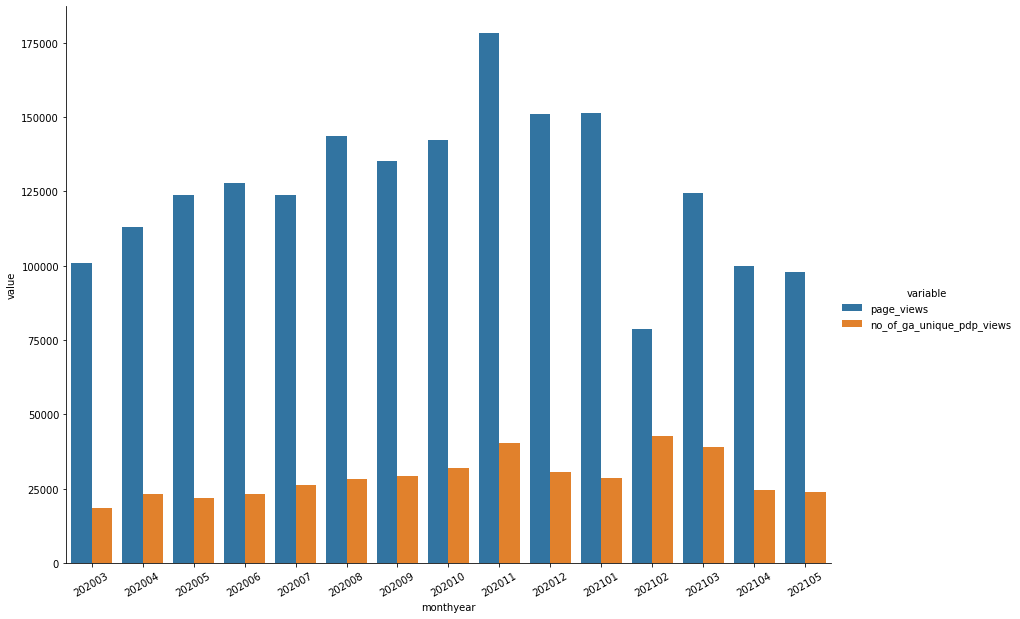

In [51]:
sns.catplot(data =pd.melt(mmm[['page_views', 'no_of_ga_unique_pdp_views','monthyear']],['monthyear']), x = 'monthyear', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


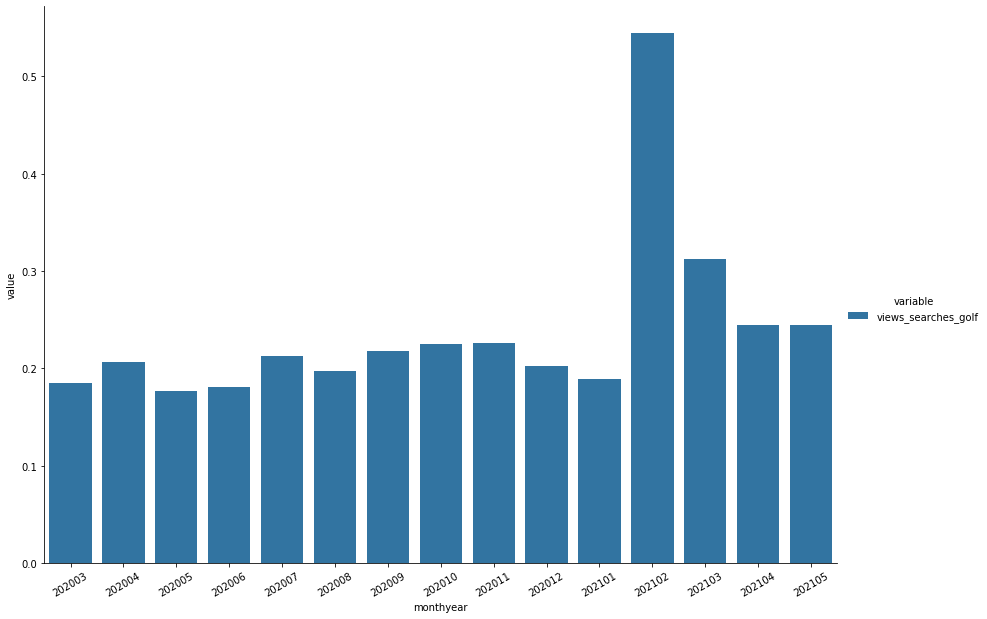

In [53]:
sns.catplot(data =pd.melt(mmm[[ 'views_searches_golf','monthyear']],['monthyear']), x = 'monthyear', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


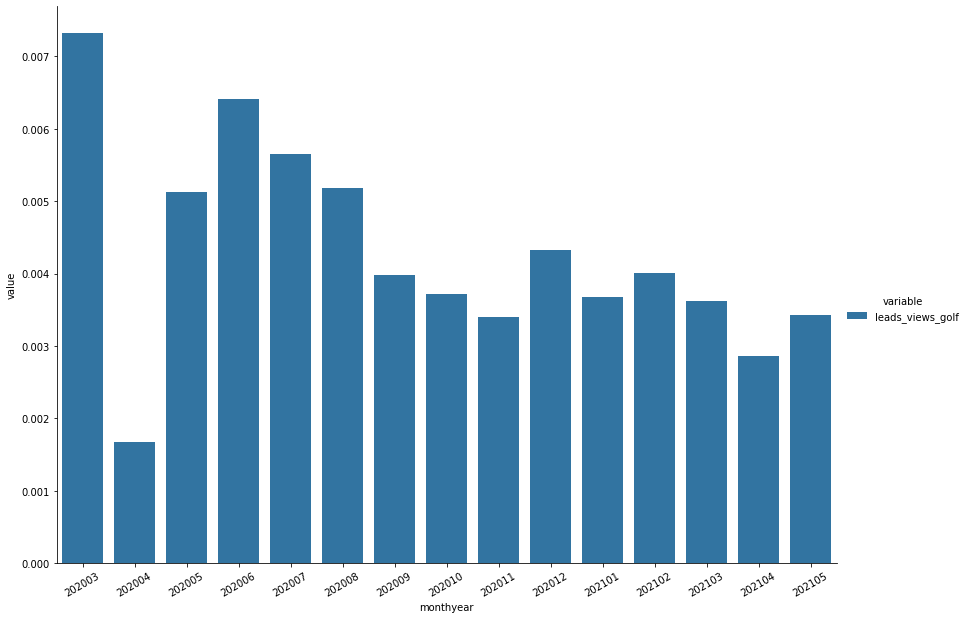

In [55]:
sns.catplot(data =pd.melt(mmm[['leads_views_golf','monthyear']],['monthyear']), x = 'monthyear', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


In [ ]:
dates = ['2019-10-01','2019-11-01','2019-12-01',
    '2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01',
         
    '2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
         '2021-04-01', '2021-05-01']
searches_golf = []
leads_golf = []
views_golf = []
inv_golf = []

for date in dates:
    h0 = df_s[(pd.to_datetime(df_s.date)>=pd.to_datetime(date))&(pd.to_datetime(df_s.date)<pd.to_datetime(date)+timedelta(days=30))]
    h = df_m[(pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&
            (pd.to_datetime(df_m.date)<=pd.to_datetime(date)+timedelta(days=30))]
    h1 = df_[(pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))]
    searches_golf.append(h0[h0.model=='golf'].page_views.sum())
    leads_golf.append(h[h.model_key=='golf'].leads_total.sum())
    views_golf.append(h[h.model_key=='golf'].no_of_ga_unique_pdp_views.sum())
    inv_golf.append(h1[h1.model_key=='golf'].id.count())
                      
df_avs = pd.DataFrame({'date':dates,'leads_golf':leads_golf, 
                     'inv_golf':inv_golf,
                     'views_golf': views_golf, 'searches_golf': searches_golf})


In [1]:
df_s.head()

NameError: name 'df_s' is not defined

In [95]:
dates = ['2019-10-01','2019-11-01','2019-12-01',
    '2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01',
         
    '2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
         '2021-04-01', '2021-05-01']
leads_golf = []
leads_golf_50000 = []
leads_golf_100000 = []
leads_golf_more100000 = []
inv_golf = []
inv_golf_50000 = []
inv_golf_100000 = []
inv_golf_more100000 = []
views_golf = []
views_golf_50000 = []
views_golf_100000 = []
views_golf_more100000 = []
for date in dates:
    h = df_m[(pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&
            (pd.to_datetime(df_m.date)<=pd.to_datetime(date)+timedelta(days=30))]
    h1 = df_[(pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))]
    leads_golf.append(h[(h.model_key=='golf')].leads_total.sum())
    leads_golf_50000.append(h[(h.model_key=='golf')&(h.mileage<50000)].leads_total.sum())
    leads_golf_100000.append(h[(h.model_key=='golf')&(h.mileage>=50000)&(h.mileage<100000)].leads_total.sum())
    leads_golf_more100000.append(h[(h.model_key=='golf')&(h.mileage>=100000)].leads_total.sum())
    views_golf.append(h[(h.model_key=='golf')].no_of_ga_unique_pdp_views.sum())
    views_golf_50000.append(h[(h.model_key=='golf')&(h.mileage<50000)].no_of_ga_unique_pdp_views.sum())
    views_golf_100000.append(h[(h.model_key=='golf')&(h.mileage>=50000)&(h.mileage<100000)].no_of_ga_unique_pdp_views.sum())
    views_golf_more100000.append(h[(h.model_key=='golf')&(h.mileage>=100000)].no_of_ga_unique_pdp_views.sum())
    inv_golf.append(h1[h1.model_key=='golf'].id.count())
    inv_golf_50000.append(h1[(h1.model_key=='golf')&(h1.mileage<50000)].id.count())
    inv_golf_100000.append(h1[(h1.model_key=='golf')&(h1.mileage>=50000)&(h1.mileage<100000)].id.count())
    inv_golf_more100000.append(h1[(h1.model_key=='golf')&(h1.mileage>=100000)].id.count())
                      
df_av = pd.DataFrame({'date':dates,'leads_golf':leads_golf, 
                     'leads_golf_50000': leads_golf_50000, 'leads_golf_100000': leads_golf_100000, 
                      'leads_golf_200000':leads_golf_more100000,
                     'inv_golf':inv_golf,
                     'inv_golf_50000':inv_golf_50000,
                     'inv_golf_100000': inv_golf_100000,
                     'inv_golf_more100000': inv_golf_more100000,
                     'views_golf': views_golf,
                     'views_golf_50000': views_golf_50000,
                     'views_golf_100000': views_golf_100000,
                     'views_golf_more100000': views_golf_more100000})


In [96]:
df_av['leads_inv_golf'] = df_av.leads_golf / df_av.inv_golf
df_av['leads_inv_golf_50000'] = df_av.leads_golf_50000 / df_av.inv_golf_50000
df_av['leads_inv_golf_100000'] = df_av.leads_golf_100000 / df_av.inv_golf_100000
df_av['leads_inv_golf_more100000'] = df_av.leads_golf_200000 / df_av.inv_golf_more100000
df_av['leads_views_golf'] = df_av.leads_golf / df_av.views_golf
df_av['leads_views_golf_50000'] = df_av.leads_golf_50000 / df_av.views_golf_50000
df_av['leads_views_golf_100000'] = df_av.leads_golf_100000 / df_av.views_golf_100000
df_av['leads_views_golf_more100000'] = df_av.leads_golf_200000 / df_av.views_golf_more100000

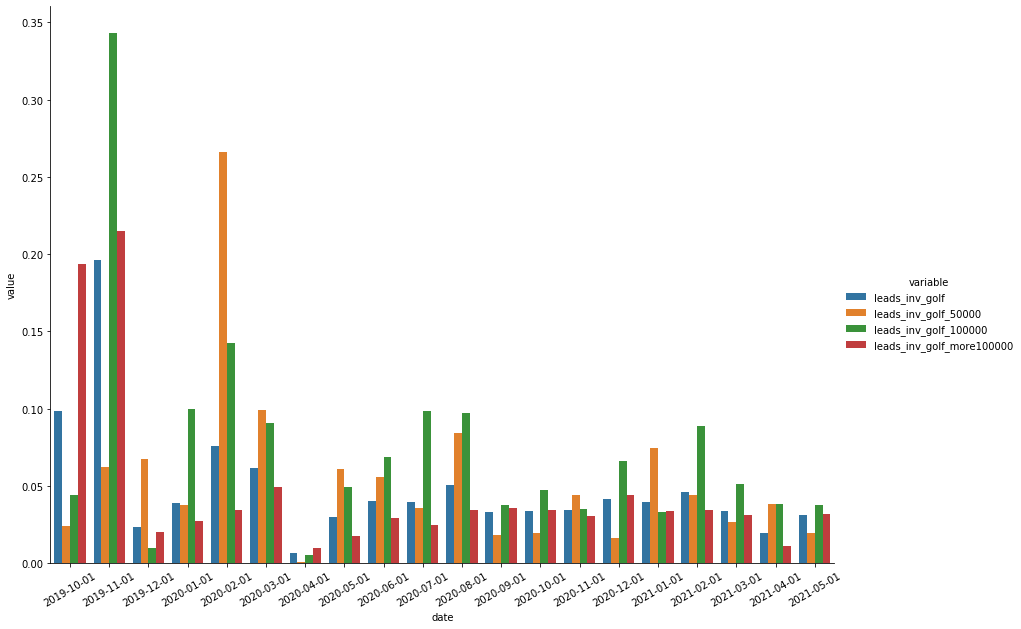

In [97]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_inv_golf','leads_inv_golf_50000', 'leads_inv_golf_100000',
                               'leads_inv_golf_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


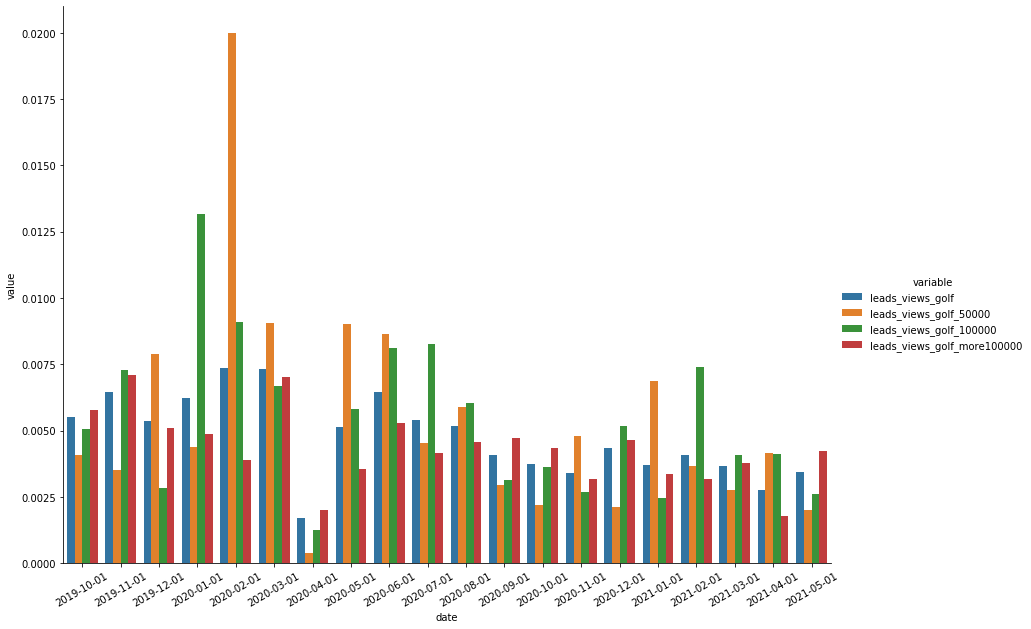

In [98]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_views_golf','leads_views_golf_50000', 'leads_views_golf_100000',
                               'leads_views_golf_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


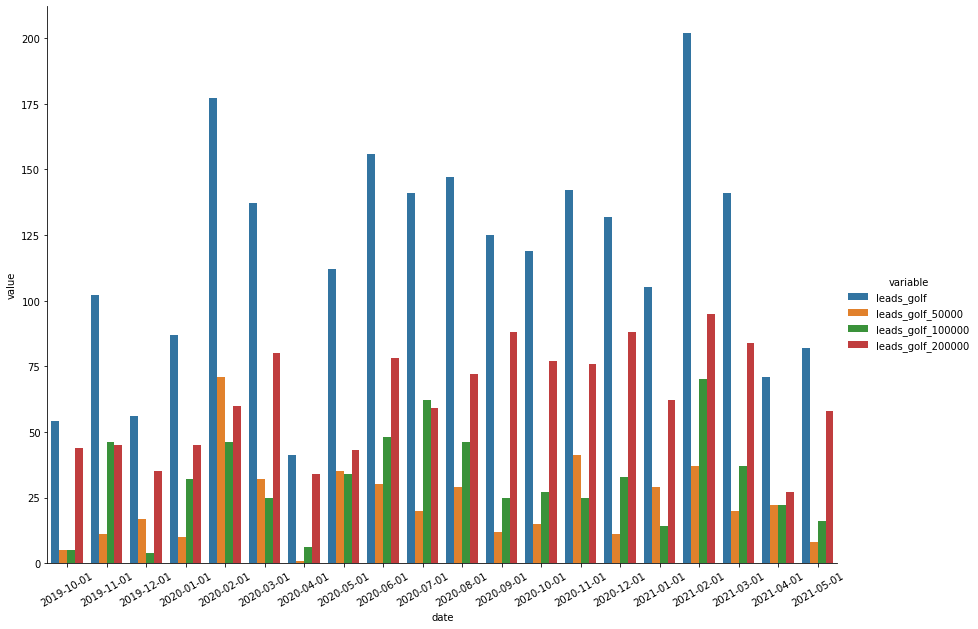

In [99]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_golf','leads_golf_50000', 'leads_golf_100000',
                               'leads_golf_200000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


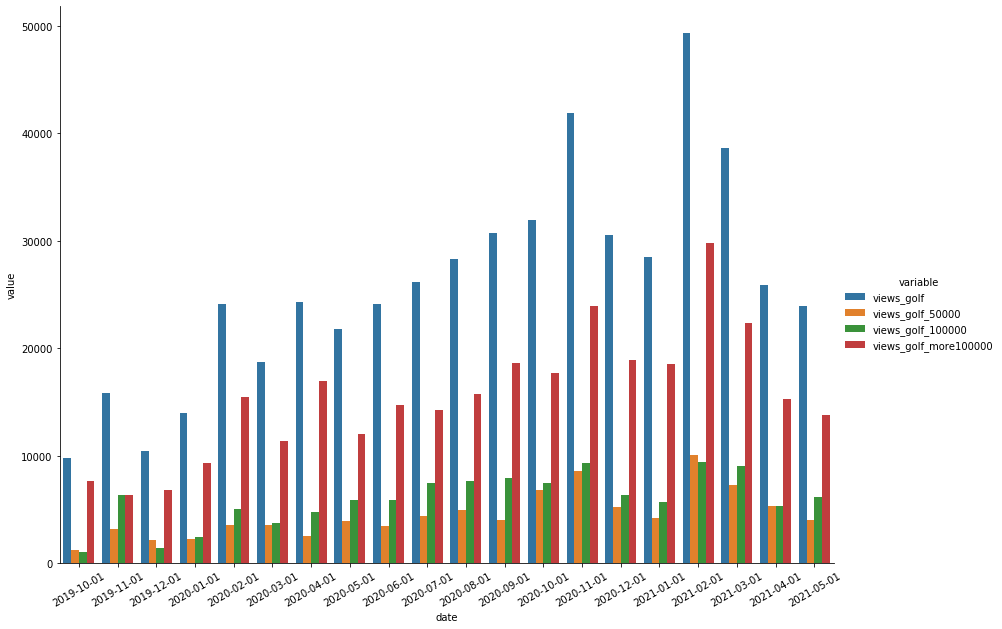

In [100]:
sns.catplot(data =pd.melt(df_av[['date', 'views_golf','views_golf_50000', 'views_golf_100000',
                               'views_golf_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


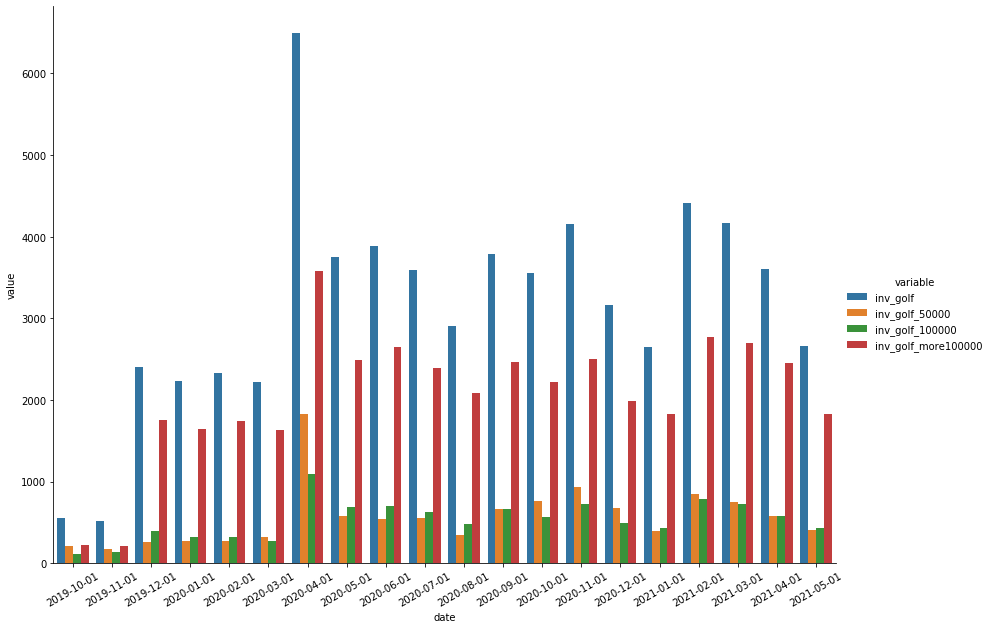

In [101]:
sns.catplot(data =pd.melt(df_av[['date', 'inv_golf','inv_golf_50000', 'inv_golf_100000',
                               'inv_golf_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


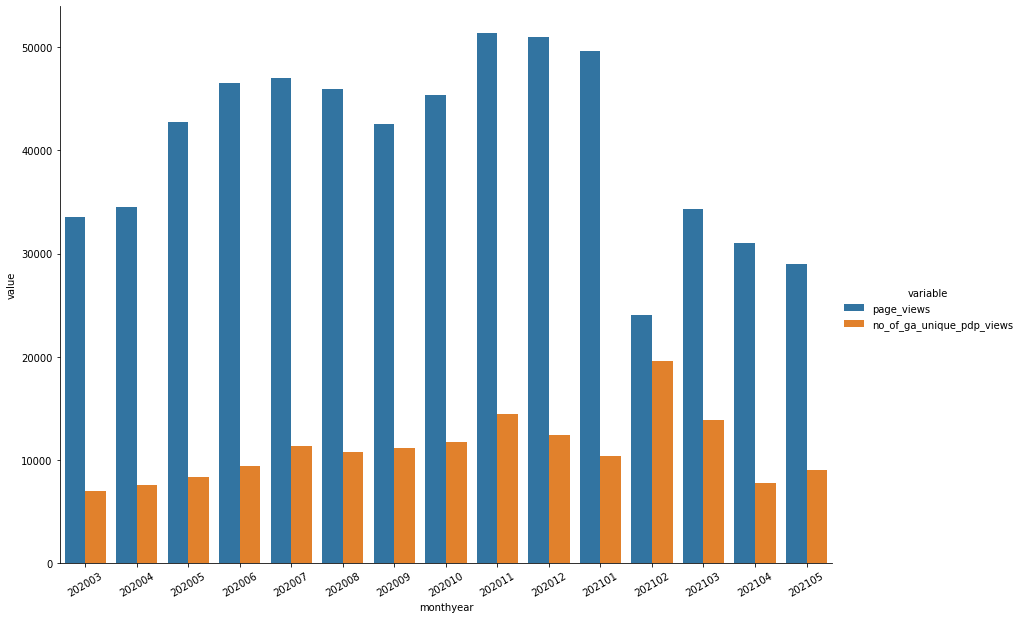

In [56]:
df_a_o = df_m[df_m.model_key=='octavia'].groupby(['action_year', 'action_month'])['leads_total', 'no_of_ga_unique_pdp_views'].sum().reset_index()
df_i_o = df_[df_.model_key=='octavia'].groupby(['created_year', 'created_month'])['id'].count().reset_index()
df_s_o = df_s[df_s.model=='octavia'].groupby(['year', 'month'])['page_views'].sum().reset_index()
mm = pd.merge(df_a_o, df_i_o, left_on=['action_year', 'action_month'], right_on=['created_year', 'created_month'])
mmm = pd.merge(mm, df_s_o, left_on=['action_year', 'action_month'], right_on=['year', 'month'])
mmm = mmm.drop(columns=['action_year', 'action_month', 'created_year', 'created_month'], axis = 1)
mmm['leads_inv_octavia'] = mmm.leads_total / mmm.id
mmm['leads_views_octavia'] = mmm.leads_total/ mmm.no_of_ga_unique_pdp_views
mmm['views_searches_octavia'] = mmm.no_of_ga_unique_pdp_views/mmm.page_views
mmm['monthyear'] = mmm.year + mmm.month
mmm = mmm.drop(columns=['year', 'month'], axis = 1)
sns.catplot(data =pd.melt(mmm[['page_views', 'no_of_ga_unique_pdp_views','monthyear']],['monthyear']), x = 'monthyear', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);



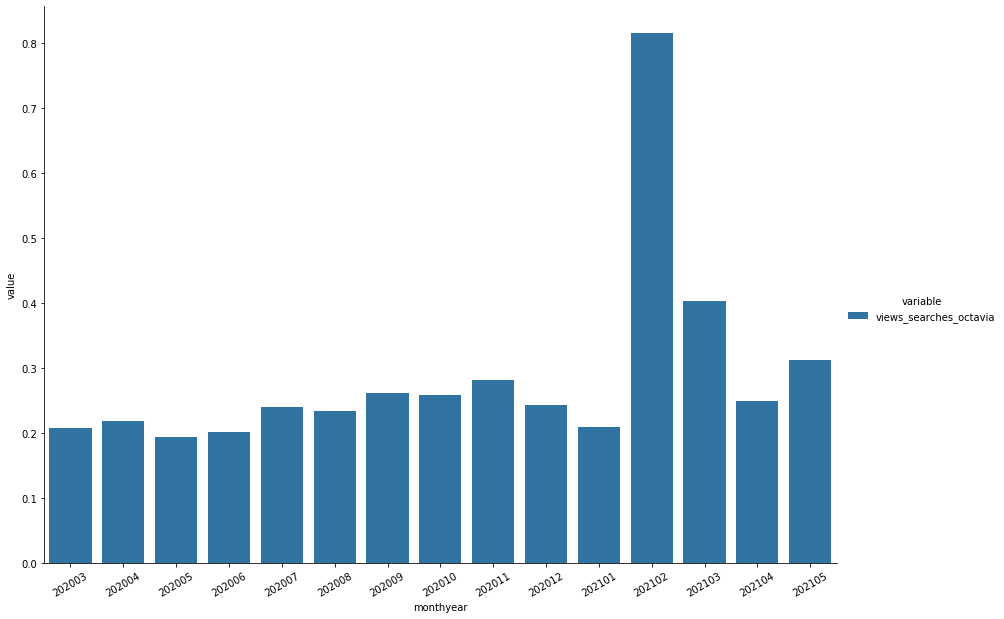

In [57]:
sns.catplot(data =pd.melt(mmm[[ 'views_searches_octavia','monthyear']],['monthyear']), x = 'monthyear', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


In [102]:
dates = ['2019-10-01','2019-11-01','2019-12-01',
    '2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01',
         
    '2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
         '2021-04-01', '2021-05-01']
leads_octavia = []
leads_octavia_50000 = []
leads_octavia_100000 = []
leads_octavia_more100000 = []
inv_octavia = []
inv_octavia_50000 = []
inv_octavia_100000 = []
inv_octavia_more100000 = []
views_octavia = []
views_octavia_50000 = []
views_octavia_100000 = []
views_octavia_more100000 = []
for date in dates:
    h = df_m[(pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&
            (pd.to_datetime(df_m.date)<=pd.to_datetime(date)+timedelta(days=30))]
    h1 = df_[(pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))]
    leads_octavia.append(h[(h.model_key=='octavia')].leads_total.sum())
    leads_octavia_50000.append(h[(h.model_key=='octavia')&(h.mileage<50000)].leads_total.sum())
    leads_octavia_100000.append(h[(h.model_key=='octavia')&(h.mileage>=50000)&(h.mileage<100000)].leads_total.sum())
    leads_octavia_more100000.append(h[(h.model_key=='octavia')&(h.mileage>=100000)].leads_total.sum())
    views_octavia.append(h[(h.model_key=='octavia')].no_of_ga_unique_pdp_views.sum())
    views_octavia_50000.append(h[(h.model_key=='octavia')&(h.mileage<50000)].no_of_ga_unique_pdp_views.sum())
    views_octavia_100000.append(h[(h.model_key=='octavia')&(h.mileage>=50000)&(h.mileage<100000)].no_of_ga_unique_pdp_views.sum())
    views_octavia_more100000.append(h[(h.model_key=='octavia')&(h.mileage>=100000)].no_of_ga_unique_pdp_views.sum())
    inv_octavia.append(h1[h1.model_key=='octavia'].id.count())
    inv_octavia_50000.append(h1[(h1.model_key=='octavia')&(h1.mileage<50000)].id.count())
    inv_octavia_100000.append(h1[(h1.model_key=='octavia')&(h1.mileage>=50000)&(h1.mileage<100000)].id.count())
    inv_octavia_more100000.append(h1[(h1.model_key=='octavia')&(h1.mileage>=100000)].id.count())
                      



In [104]:
df_av = pd.DataFrame({'date':dates,'leads_octavia':leads_octavia, 
                     'leads_octavia_50000': leads_octavia_50000, 'leads_octavia_100000': leads_octavia_100000, 
                      'leads_octavia_more100000':leads_octavia_more100000,
                     'inv_octavia':inv_octavia,
                     'inv_octavia_50000':inv_octavia_50000,
                     'inv_octavia_100000': inv_octavia_100000,
                     'inv_octavia_more100000': inv_octavia_more100000,
                     'views_octavia': views_octavia,
                     'views_octavia_50000': views_octavia_50000,
                     'views_octavia_100000': views_octavia_100000,
                     'views_octavia_more100000': views_octavia_more100000})
df_av['leads_inv_octavia'] = df_av.leads_octavia / df_av.inv_octavia
df_av['leads_inv_octavia_50000'] = df_av.leads_octavia_50000 / df_av.inv_octavia_50000
df_av['leads_inv_octavia_100000'] = df_av.leads_octavia_100000 / df_av.inv_octavia_100000
df_av['leads_inv_octavia_more100000'] = df_av.leads_octavia_more100000 / df_av.inv_octavia_more100000
df_av['leads_views_octavia'] = df_av.leads_octavia / df_av.views_octavia
df_av['leads_views_octavia_50000'] = df_av.leads_octavia_50000 / df_av.views_octavia_50000
df_av['leads_views_octavia_100000'] = df_av.leads_octavia_100000 / df_av.views_octavia_100000
df_av['leads_views_octavia_more100000'] = df_av.leads_octavia_more100000 / df_av.views_octavia_more100000

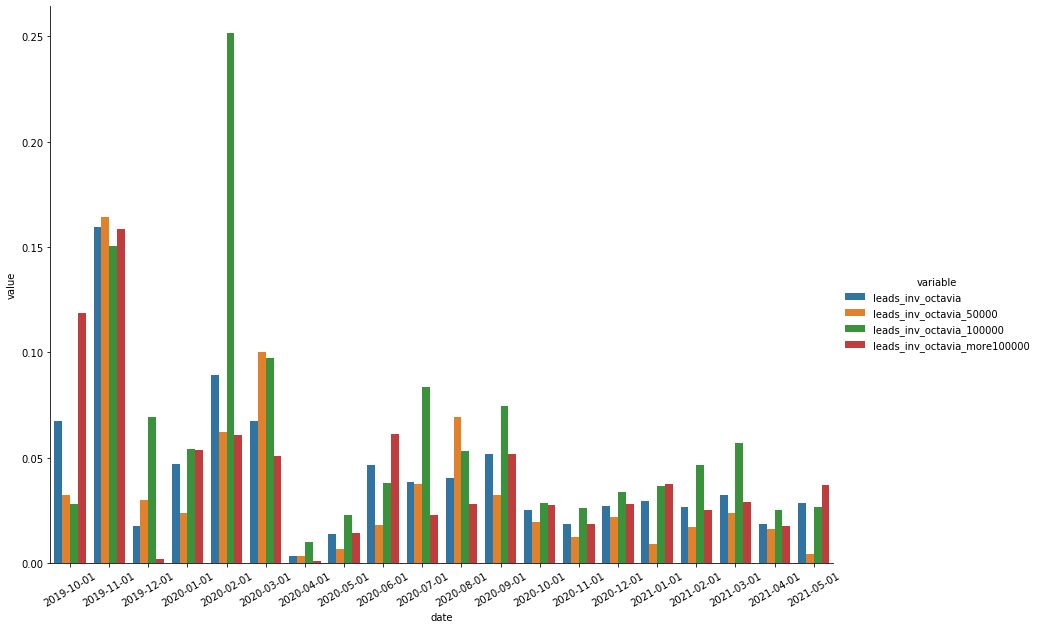

In [105]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_inv_octavia','leads_inv_octavia_50000', 'leads_inv_octavia_100000',
                               'leads_inv_octavia_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


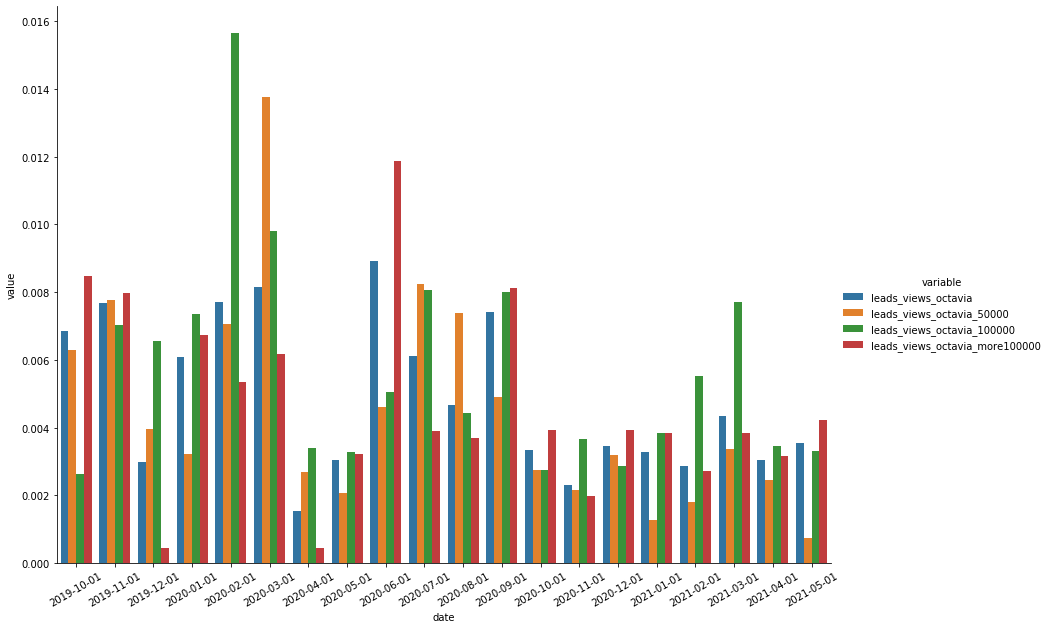

In [106]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_views_octavia','leads_views_octavia_50000', 'leads_views_octavia_100000',
                               'leads_views_octavia_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


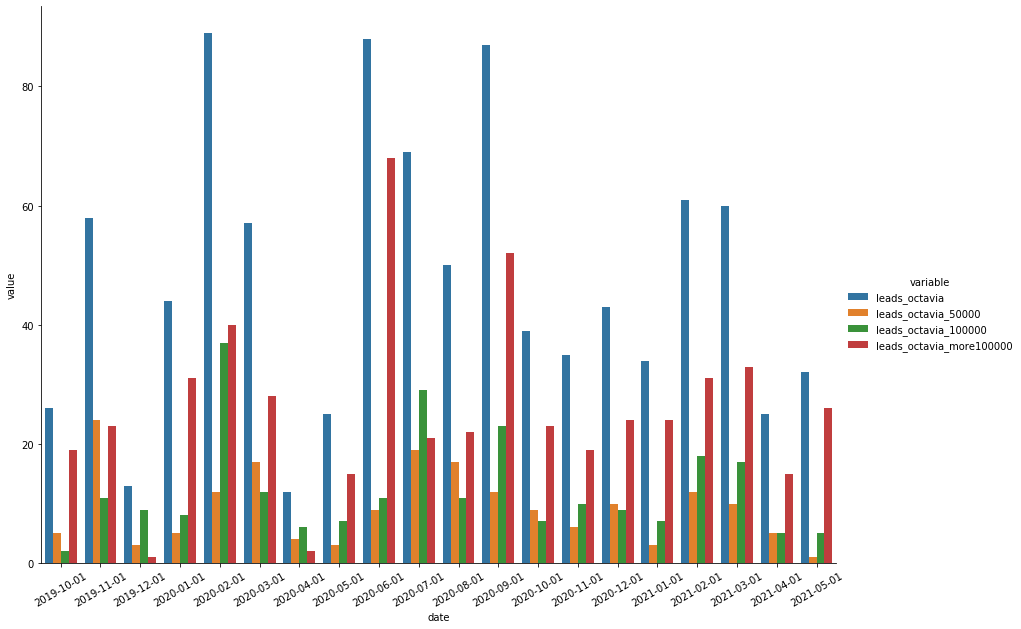

In [107]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_octavia','leads_octavia_50000', 'leads_octavia_100000',
                               'leads_octavia_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


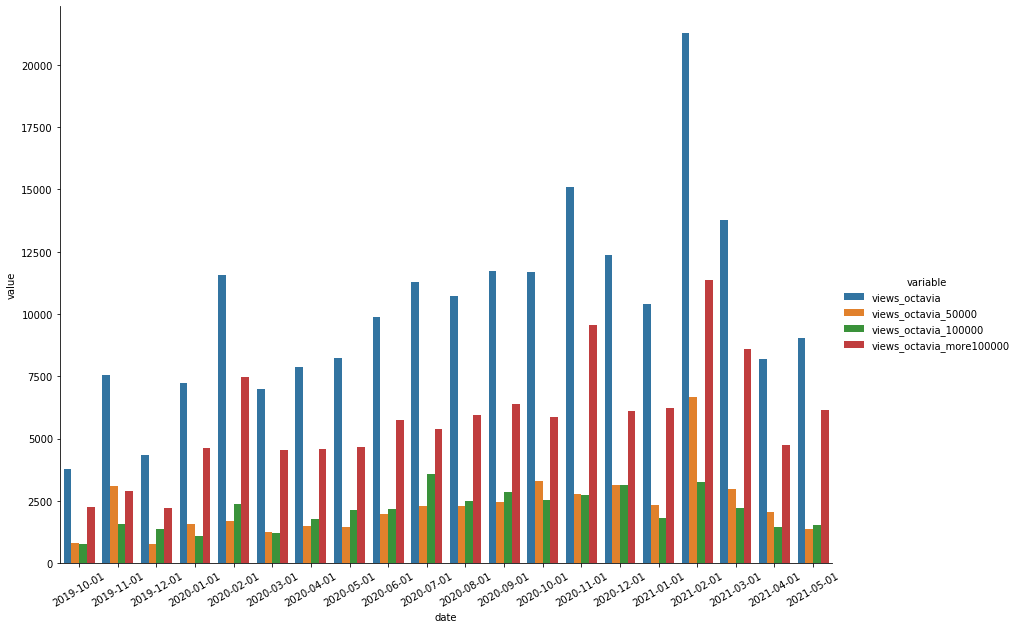

In [108]:
sns.catplot(data =pd.melt(df_av[['date', 'views_octavia','views_octavia_50000', 'views_octavia_100000',
                               'views_octavia_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


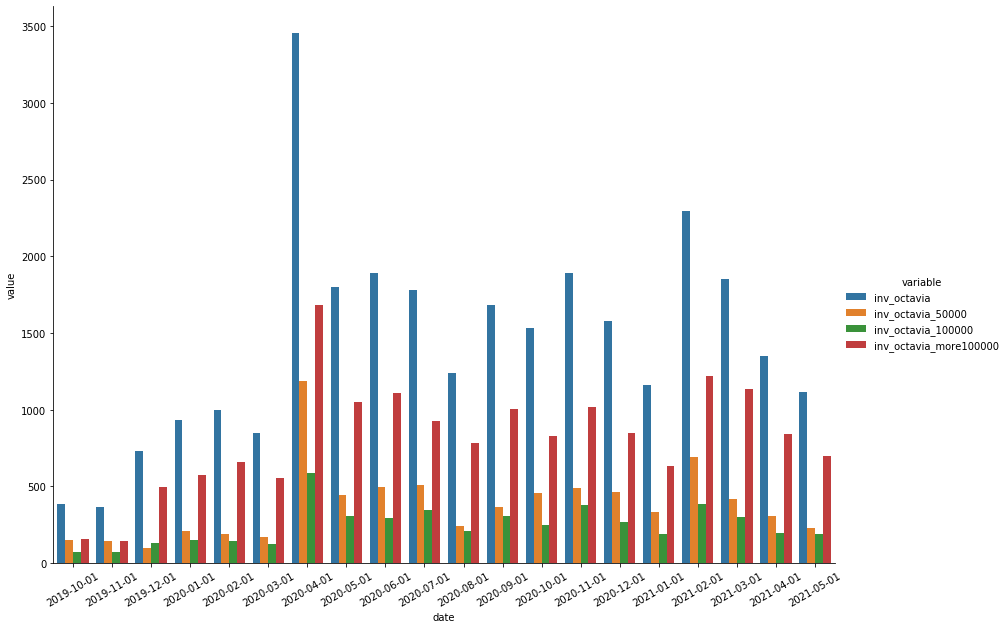

In [109]:
sns.catplot(data =pd.melt(df_av[['date', 'inv_octavia','inv_octavia_50000', 'inv_octavia_100000',
                               'inv_octavia_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


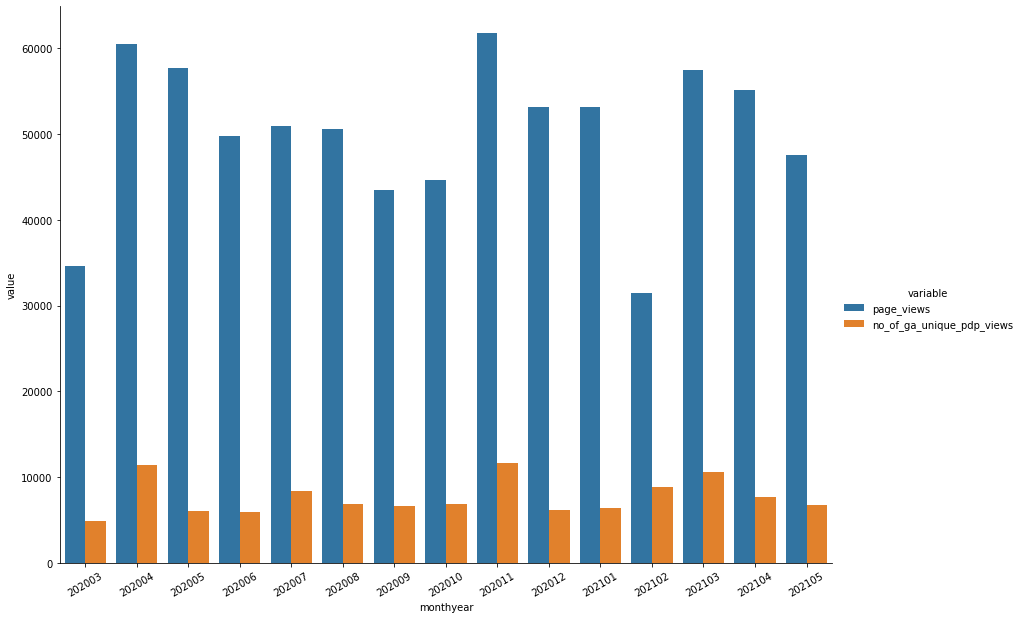

In [58]:
df_a_o = df_m[df_m.model_key=='911'].groupby(['action_year', 'action_month'])['leads_total', 'no_of_ga_unique_pdp_views'].sum().reset_index()
df_i_o = df_[df_.model_key=='911'].groupby(['created_year', 'created_month'])['id'].count().reset_index()
df_s_o = df_s[df_s.model=='911'].groupby(['year', 'month'])['page_views'].sum().reset_index()
mm = pd.merge(df_a_o, df_i_o, left_on=['action_year', 'action_month'], right_on=['created_year', 'created_month'])
mmm = pd.merge(mm, df_s_o, left_on=['action_year', 'action_month'], right_on=['year', 'month'])
mmm = mmm.drop(columns=['action_year', 'action_month', 'created_year', 'created_month'], axis = 1)
mmm['leads_inv_911'] = mmm.leads_total / mmm.id
mmm['leads_views_911'] = mmm.leads_total/ mmm.no_of_ga_unique_pdp_views
mmm['views_searches_911'] = mmm.no_of_ga_unique_pdp_views/mmm.page_views
mmm['monthyear'] = mmm.year + mmm.month
mmm = mmm.drop(columns=['year', 'month'], axis = 1)
sns.catplot(data =pd.melt(mmm[['page_views', 'no_of_ga_unique_pdp_views','monthyear']],['monthyear']), x = 'monthyear', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);



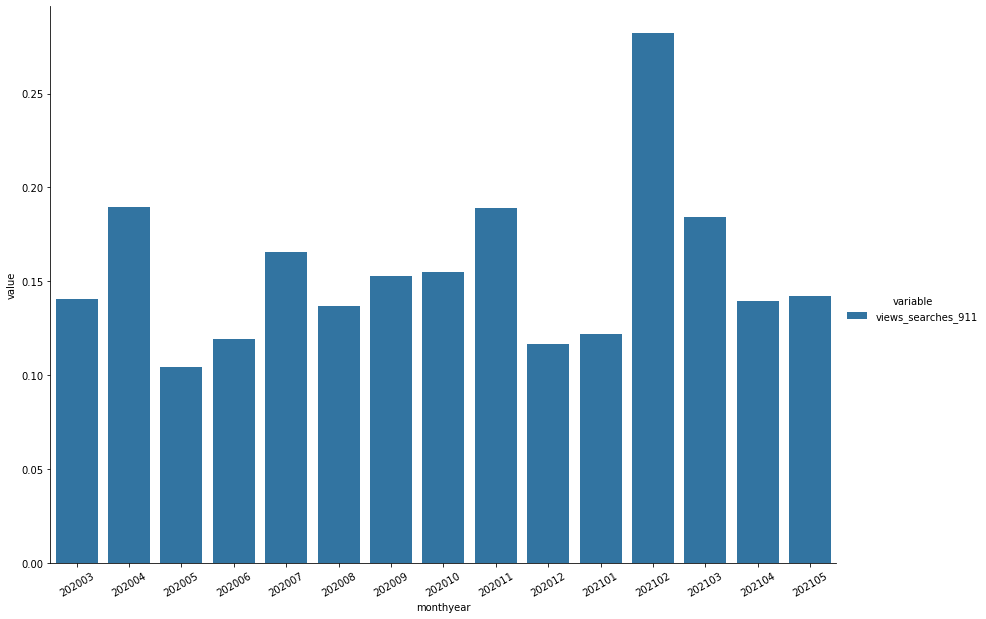

In [59]:
sns.catplot(data =pd.melt(mmm[[ 'views_searches_911','monthyear']],['monthyear']), x = 'monthyear', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


In [110]:
dates = ['2019-10-01','2019-11-01','2019-12-01',
    '2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01',
         
    '2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
         '2021-04-01', '2021-05-01']
leads_911 = []
leads_911_50000 = []
leads_911_100000 = []
leads_911_more100000 = []
inv_911 = []
inv_911_50000 = []
inv_911_100000 = []
inv_911_more100000 = []
views_911 = []
views_911_50000 = []
views_911_100000 = []
views_911_more100000 = []
for date in dates:
    h = df_m[(pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&
            (pd.to_datetime(df_m.date)<=pd.to_datetime(date)+timedelta(days=30))]
    h1 = df_[(pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))]
    leads_911.append(h[(h.model_key=='911')].leads_total.sum())
    leads_911_50000.append(h[(h.model_key=='911')&(h.mileage<50000)].leads_total.sum())
    leads_911_100000.append(h[(h.model_key=='911')&(h.mileage>=50000)&(h.mileage<100000)].leads_total.sum())
    leads_911_more100000.append(h[(h.model_key=='911')&(h.mileage>=100000)].leads_total.sum())
    views_911.append(h[(h.model_key=='911')].no_of_ga_unique_pdp_views.sum())
    views_911_50000.append(h[(h.model_key=='911')&(h.mileage<50000)].no_of_ga_unique_pdp_views.sum())
    views_911_100000.append(h[(h.model_key=='911')&(h.mileage>=50000)&(h.mileage<100000)].no_of_ga_unique_pdp_views.sum())
    views_911_more100000.append(h[(h.model_key=='911')&(h.mileage>=100000)].no_of_ga_unique_pdp_views.sum())
    inv_911.append(h1[h1.model_key=='911'].id.count())
    inv_911_50000.append(h1[(h1.model_key=='911')&(h1.mileage<50000)].id.count())
    inv_911_100000.append(h1[(h1.model_key=='911')&(h1.mileage>=50000)&(h1.mileage<100000)].id.count())
    inv_911_more100000.append(h1[(h1.model_key=='911')&(h1.mileage>=100000)].id.count())
                      


In [111]:
df_av = pd.DataFrame({'date':dates,'leads_911':leads_911, 
                     'leads_911_50000': leads_911_50000, 'leads_911_100000': leads_911_100000, 
                      'leads_911_more100000':leads_911_more100000,
                     'inv_911':inv_911,
                     'inv_911_50000':inv_911_50000,
                     'inv_911_100000': inv_911_100000,
                     'inv_911_more100000': inv_911_more100000,
                     'views_911': views_911,
                     'views_911_50000': views_911_50000,
                     'views_911_100000': views_911_100000,
                     'views_911_more100000': views_911_more100000})

In [112]:
df_av['leads_inv_911'] = df_av.leads_911 / df_av.inv_911
df_av['leads_inv_911_50000'] = df_av.leads_911_50000 / df_av.inv_911_50000
df_av['leads_inv_911_100000'] = df_av.leads_911_100000 / df_av.inv_911_100000
df_av['leads_inv_911_more100000'] = df_av.leads_911_more100000 / df_av.inv_911_more100000
df_av['leads_views_911'] = df_av.leads_911 / df_av.views_911
df_av['leads_views_911_50000'] = df_av.leads_911_50000 / df_av.views_911_50000
df_av['leads_views_911_100000'] = df_av.leads_911_100000 / df_av.views_911_100000
df_av['leads_views_911_more100000'] = df_av.leads_911_more100000 / df_av.views_911_more100000

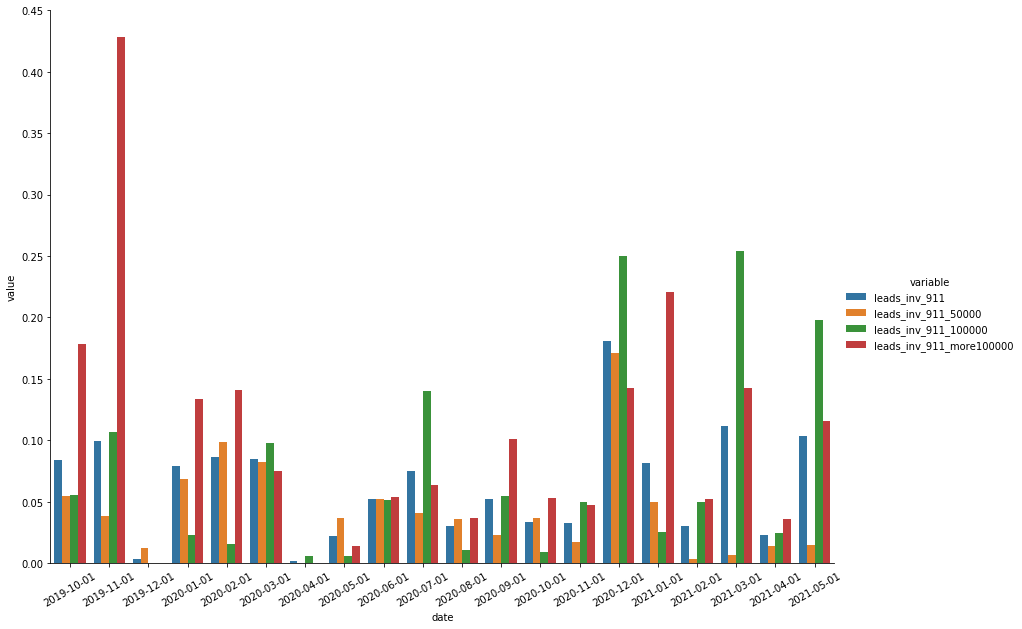

In [113]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_inv_911','leads_inv_911_50000', 'leads_inv_911_100000',
                               'leads_inv_911_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


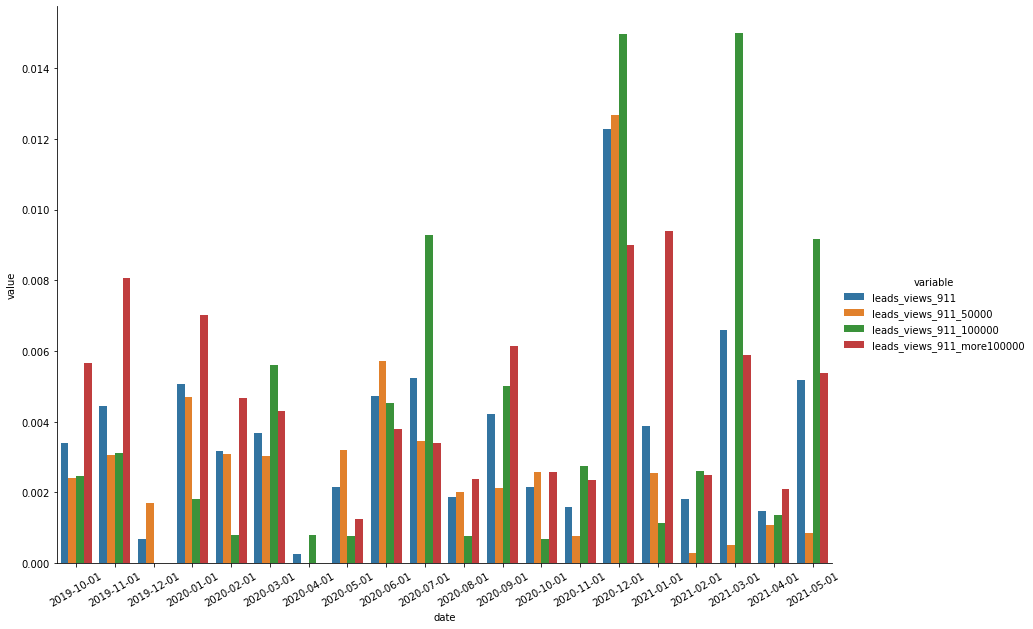

In [114]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_views_911','leads_views_911_50000', 'leads_views_911_100000',
                               'leads_views_911_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


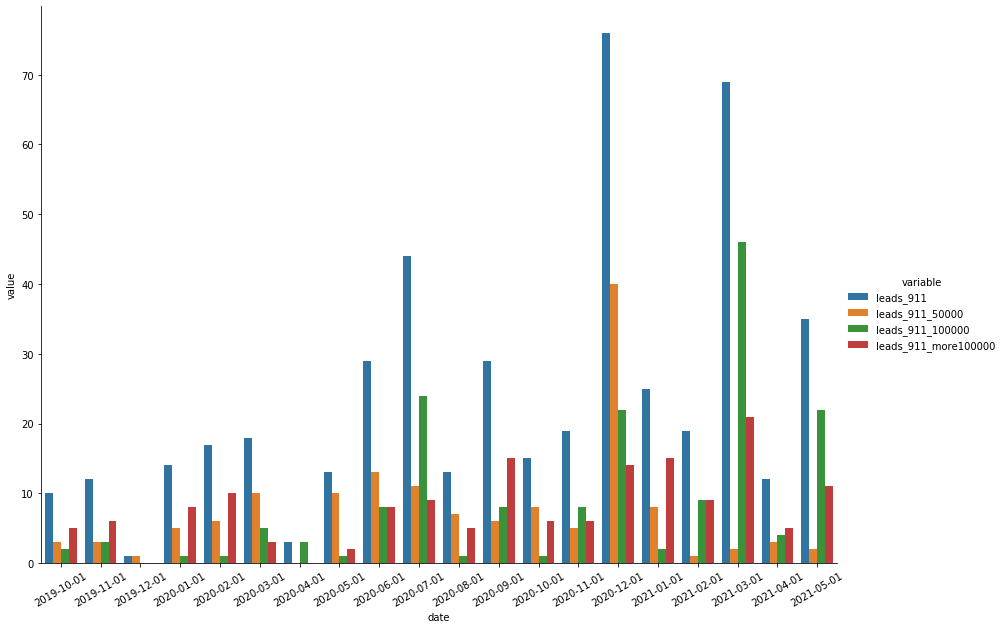

In [115]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_911','leads_911_50000', 'leads_911_100000',
                               'leads_911_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


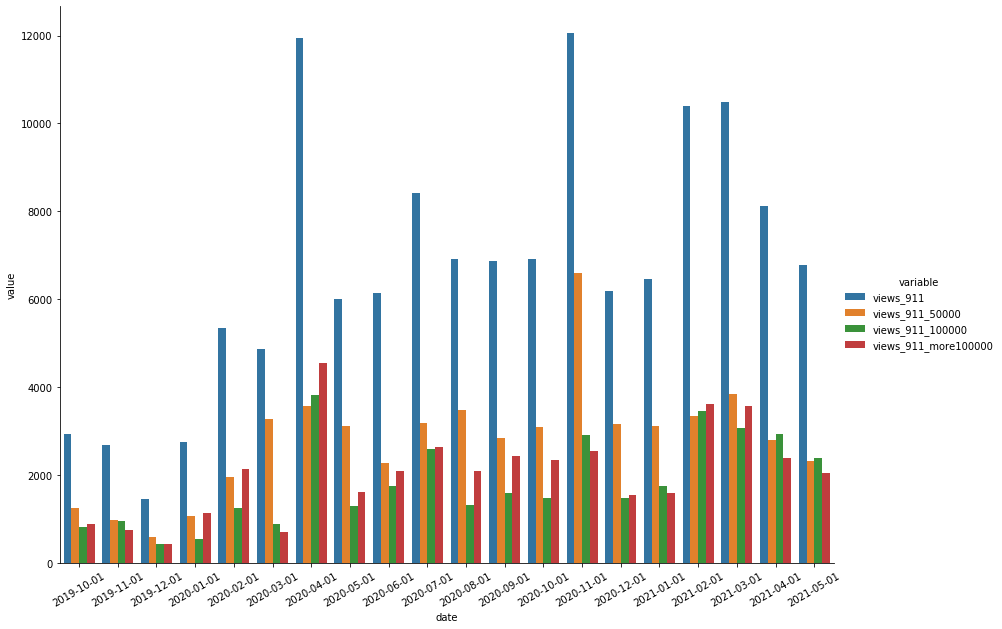

In [116]:
sns.catplot(data =pd.melt(df_av[['date', 'views_911','views_911_50000', 'views_911_100000',
                               'views_911_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


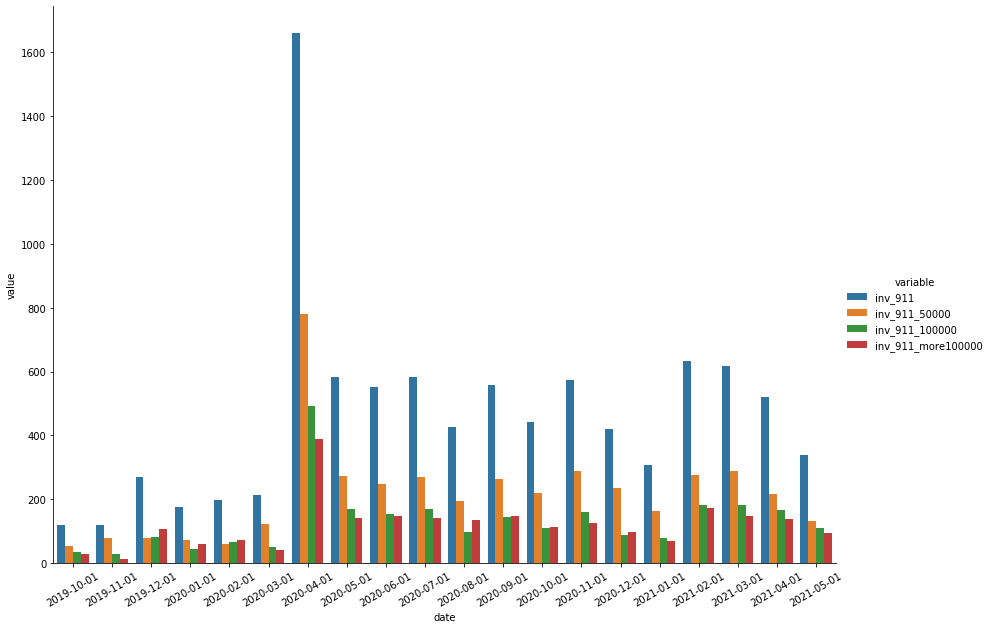

In [117]:
sns.catplot(data =pd.melt(df_av[['date', 'inv_911','inv_911_50000', 'inv_911_100000',
                               'inv_911_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


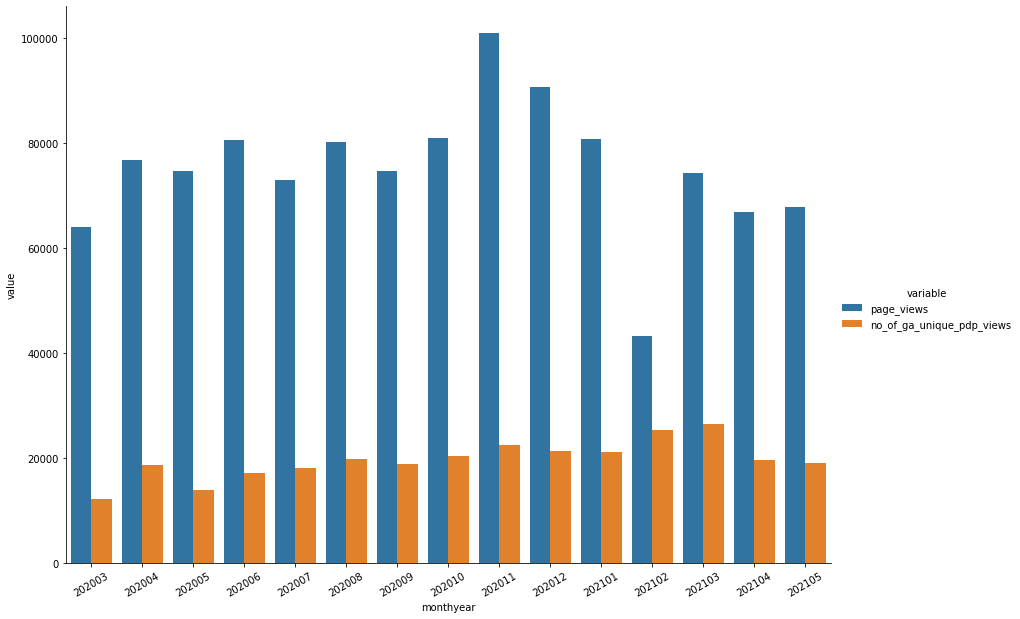

In [60]:
df_a_o = df_m[df_m.model_key=='3er'].groupby(['action_year', 'action_month'])['leads_total', 'no_of_ga_unique_pdp_views'].sum().reset_index()
df_i_o = df_[df_.model_key=='3er'].groupby(['created_year', 'created_month'])['id'].count().reset_index()
df_s_o = df_s[df_s.model=='3er'].groupby(['year', 'month'])['page_views'].sum().reset_index()
mm = pd.merge(df_a_o, df_i_o, left_on=['action_year', 'action_month'], right_on=['created_year', 'created_month'])
mmm = pd.merge(mm, df_s_o, left_on=['action_year', 'action_month'], right_on=['year', 'month'])
mmm = mmm.drop(columns=['action_year', 'action_month', 'created_year', 'created_month'], axis = 1)
mmm['leads_inv_3er'] = mmm.leads_total / mmm.id
mmm['leads_views_3er'] = mmm.leads_total/ mmm.no_of_ga_unique_pdp_views
mmm['views_searches_3er'] = mmm.no_of_ga_unique_pdp_views/mmm.page_views
mmm['monthyear'] = mmm.year + mmm.month
mmm = mmm.drop(columns=['year', 'month'], axis = 1)
sns.catplot(data =pd.melt(mmm[['page_views', 'no_of_ga_unique_pdp_views','monthyear']],['monthyear']), x = 'monthyear', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);



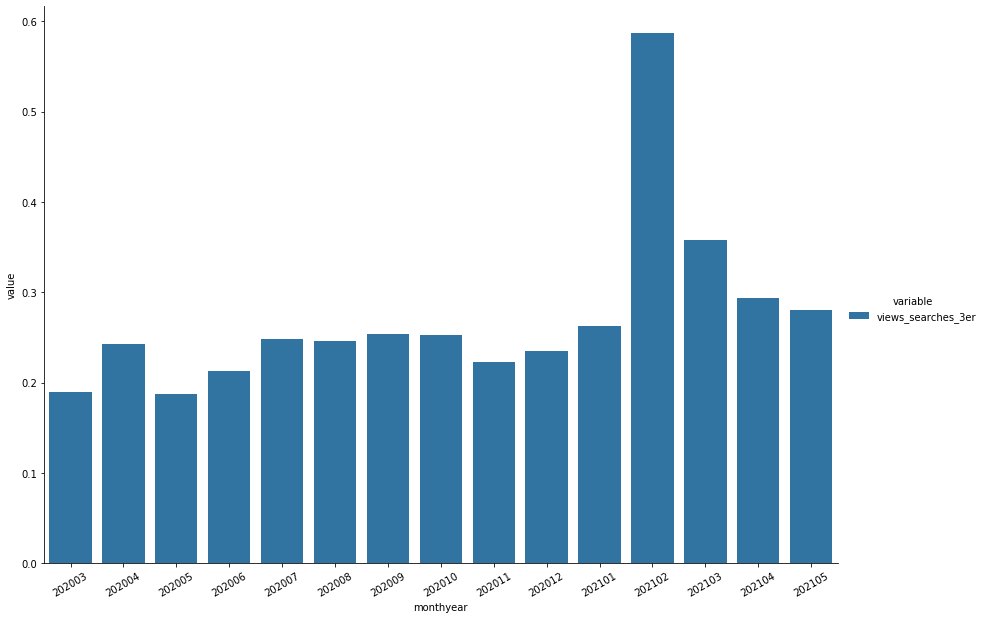

In [61]:
sns.catplot(data =pd.melt(mmm[[ 'views_searches_3er','monthyear']],['monthyear']), x = 'monthyear', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


In [118]:
dates = ['2019-10-01','2019-11-01','2019-12-01',
    '2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01',
         
    '2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
         '2021-04-01', '2021-05-01']
leads_3er = []
leads_3er_50000 = []
leads_3er_100000 = []
leads_3er_more100000 = []
inv_3er = []
inv_3er_50000 = []
inv_3er_100000 = []
inv_3er_more100000 = []
views_3er = []
views_3er_50000 = []
views_3er_100000 = []
views_3er_more100000 = []
for date in dates:
    h = df_m[(pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&
            (pd.to_datetime(df_m.date)<=pd.to_datetime(date)+timedelta(days=30))]
    h1 = df_[(pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))]
    leads_3er.append(h[(h.model_key=='3er')].leads_total.sum())
    leads_3er_50000.append(h[(h.model_key=='3er')&(h.mileage<50000)].leads_total.sum())
    leads_3er_100000.append(h[(h.model_key=='3er')&(h.mileage>=50000)&(h.mileage<100000)].leads_total.sum())
    leads_3er_more100000.append(h[(h.model_key=='3er')&(h.mileage>=100000)].leads_total.sum())
    views_3er.append(h[(h.model_key=='3er')].no_of_ga_unique_pdp_views.sum())
    views_3er_50000.append(h[(h.model_key=='3er')&(h.mileage<50000)].no_of_ga_unique_pdp_views.sum())
    views_3er_100000.append(h[(h.model_key=='3er')&(h.mileage>=50000)&(h.mileage<100000)].no_of_ga_unique_pdp_views.sum())
    views_3er_more100000.append(h[(h.model_key=='3er')&(h.mileage>=100000)].no_of_ga_unique_pdp_views.sum())
    inv_3er.append(h1[h1.model_key=='3er'].id.count())
    inv_3er_50000.append(h1[(h1.model_key=='3er')&(h1.mileage<50000)].id.count())
    inv_3er_100000.append(h1[(h1.model_key=='3er')&(h1.mileage>=50000)&(h1.mileage<100000)].id.count())
    inv_3er_more100000.append(h1[(h1.model_key=='3er')&(h1.mileage>=100000)].id.count())
                      


In [119]:
df_av = pd.DataFrame({'date':dates,'leads_3er':leads_3er, 
                     'leads_3er_50000': leads_3er_50000, 'leads_3er_100000': leads_3er_100000, 
                      'leads_3er_more100000':leads_3er_more100000,
                     'inv_3er':inv_3er,
                     'inv_3er_50000':inv_3er_50000,
                     'inv_3er_100000': inv_3er_100000,
                     'inv_3er_more100000': inv_3er_more100000,
                     'views_3er': views_3er,
                     'views_3er_50000': views_3er_50000,
                     'views_3er_100000': views_3er_100000,
                     'views_3er_more100000': views_3er_more100000})

In [120]:
df_av['leads_inv_3er'] = df_av.leads_3er / df_av.views_3er
df_av['leads_inv_3er_50000'] = df_av.leads_3er_50000 / df_av.views_3er_50000
df_av['leads_inv_3er_100000'] = df_av.leads_3er_100000 / df_av.views_3er_100000
df_av['leads_inv_3er_more100000'] = df_av.leads_3er_more100000 / df_av.views_3er_more100000
df_av['leads_views_3er'] = df_av.leads_3er / df_av.views_3er
df_av['leads_views_3er_50000'] = df_av.leads_3er_50000 / df_av.views_3er_50000
df_av['leads_views_3er_100000'] = df_av.leads_3er_100000 / df_av.views_3er_100000
df_av['leads_views_3er_more100000'] = df_av.leads_3er_more100000 / df_av.views_3er_more100000

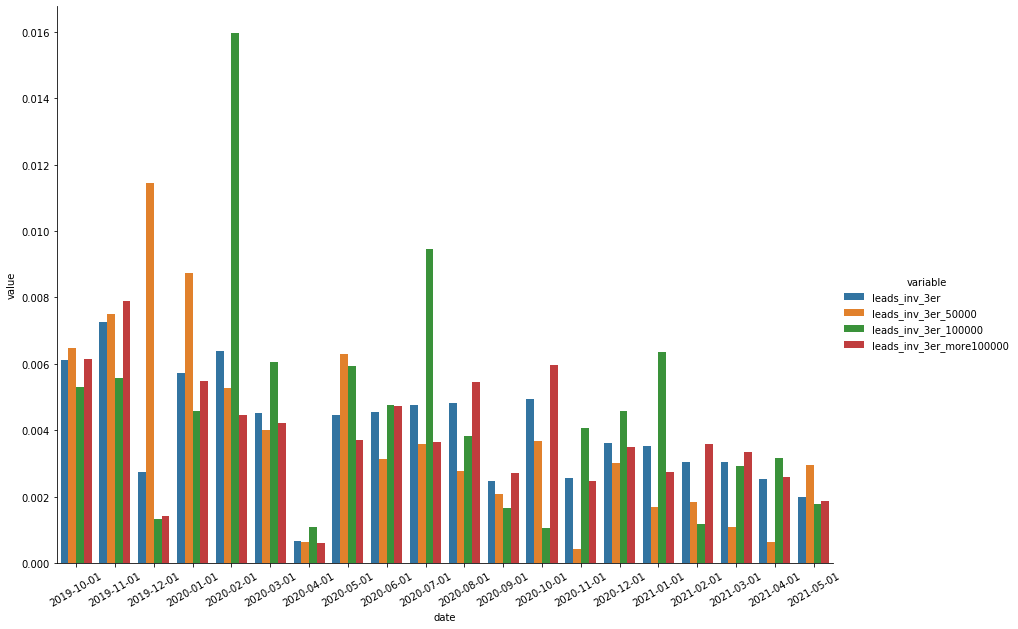

In [121]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_inv_3er','leads_inv_3er_50000', 'leads_inv_3er_100000',
                               'leads_inv_3er_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


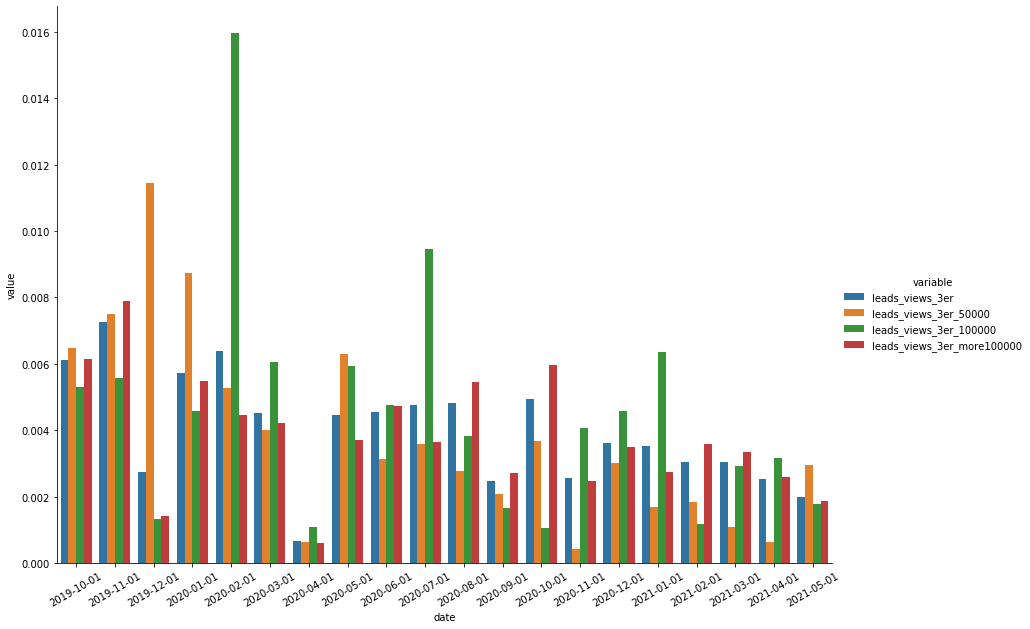

In [122]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_views_3er','leads_views_3er_50000', 'leads_views_3er_100000',
                               'leads_views_3er_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


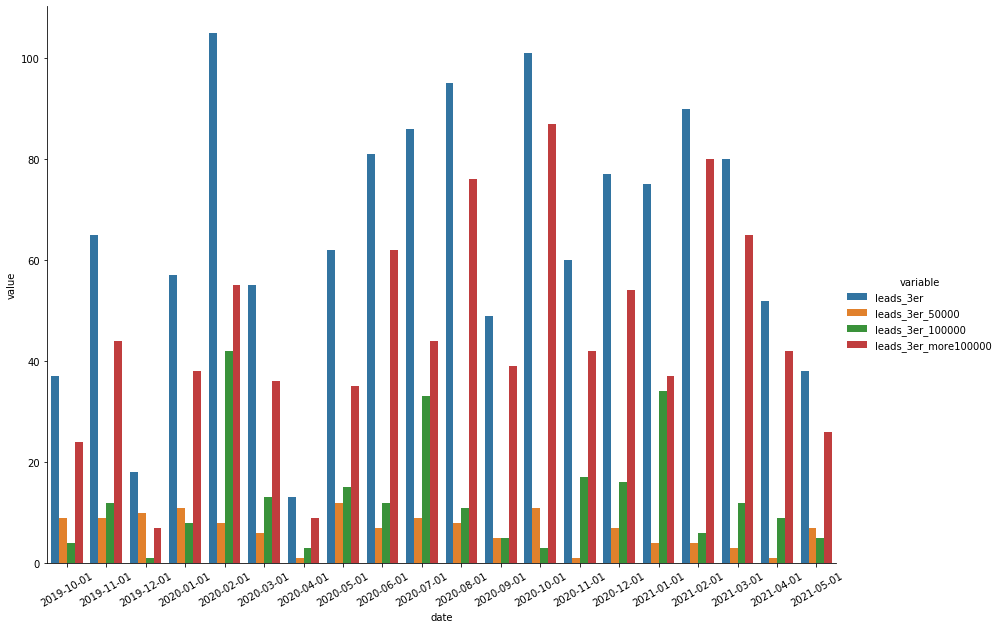

In [123]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_3er','leads_3er_50000', 'leads_3er_100000',
                               'leads_3er_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


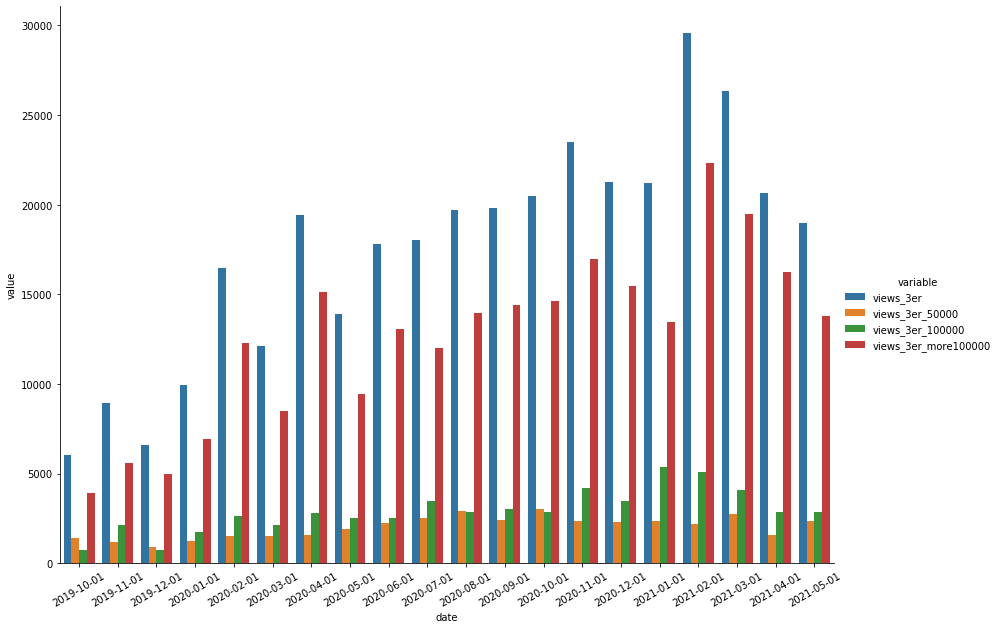

In [124]:
sns.catplot(data =pd.melt(df_av[['date', 'views_3er','views_3er_50000', 'views_3er_100000',
                               'views_3er_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


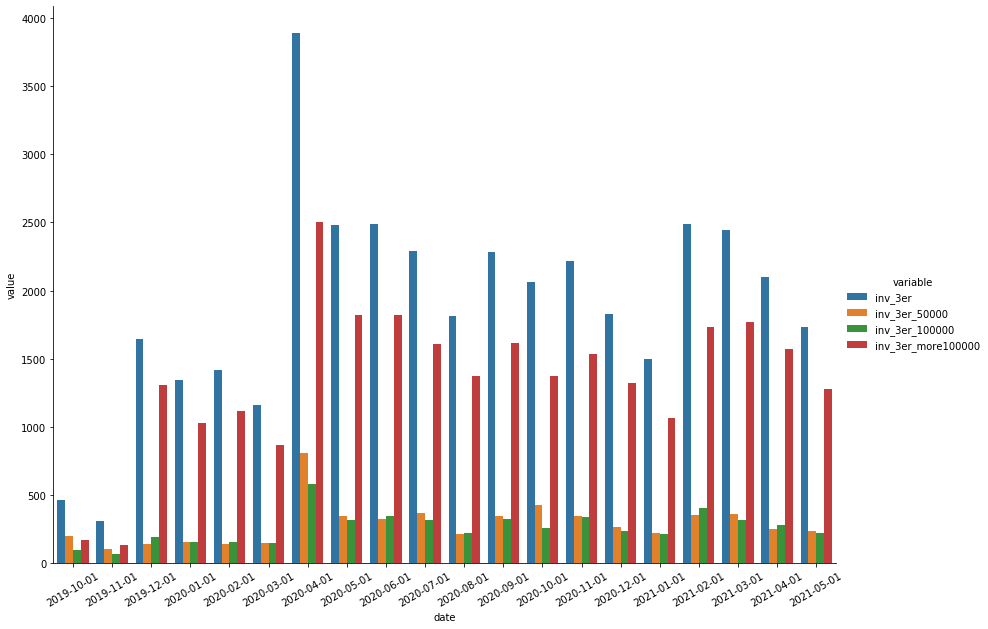

In [125]:
sns.catplot(data =pd.melt(df_av[['date', 'inv_3er','inv_3er_50000', 'inv_3er_100000',
                               'inv_3er_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


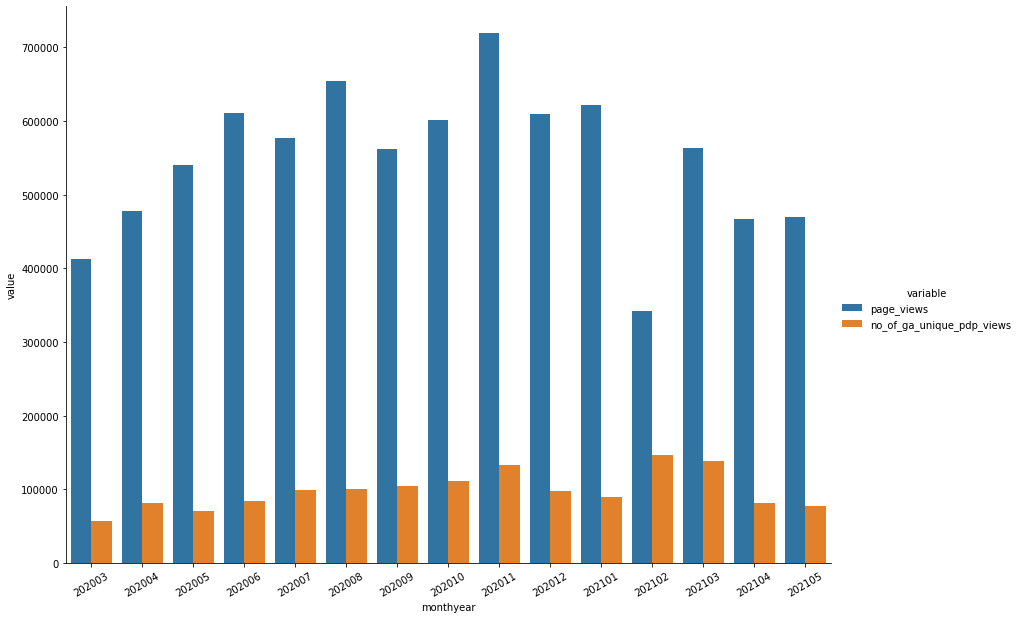

In [65]:
df_a_o = df_m[df_m.make_key=='vw'].groupby(['action_year', 'action_month'])['leads_total', 'no_of_ga_unique_pdp_views'].sum().reset_index()
df_i_o = df_[df_.make_key=='vw'].groupby(['created_year', 'created_month'])['id'].count().reset_index()
df_s_o = df_s[df_s.make=='vw'].groupby(['year', 'month'])['page_views'].sum().reset_index()
mm = pd.merge(df_a_o, df_i_o, left_on=['action_year', 'action_month'], right_on=['created_year', 'created_month'])
mmm = pd.merge(mm, df_s_o, left_on=['action_year', 'action_month'], right_on=['year', 'month'])
mmm = mmm.drop(columns=['action_year', 'action_month', 'created_year', 'created_month'], axis = 1)
mmm['leads_inv_vw'] = mmm.leads_total / mmm.id
mmm['leads_views_vw'] = mmm.leads_total/ mmm.no_of_ga_unique_pdp_views
mmm['views_searches_vw'] = mmm.no_of_ga_unique_pdp_views/mmm.page_views
mmm['monthyear'] = mmm.year + mmm.month
mmm = mmm.drop(columns=['year', 'month'], axis = 1)
sns.catplot(data =pd.melt(mmm[['page_views', 'no_of_ga_unique_pdp_views','monthyear']],['monthyear']), x = 'monthyear', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);



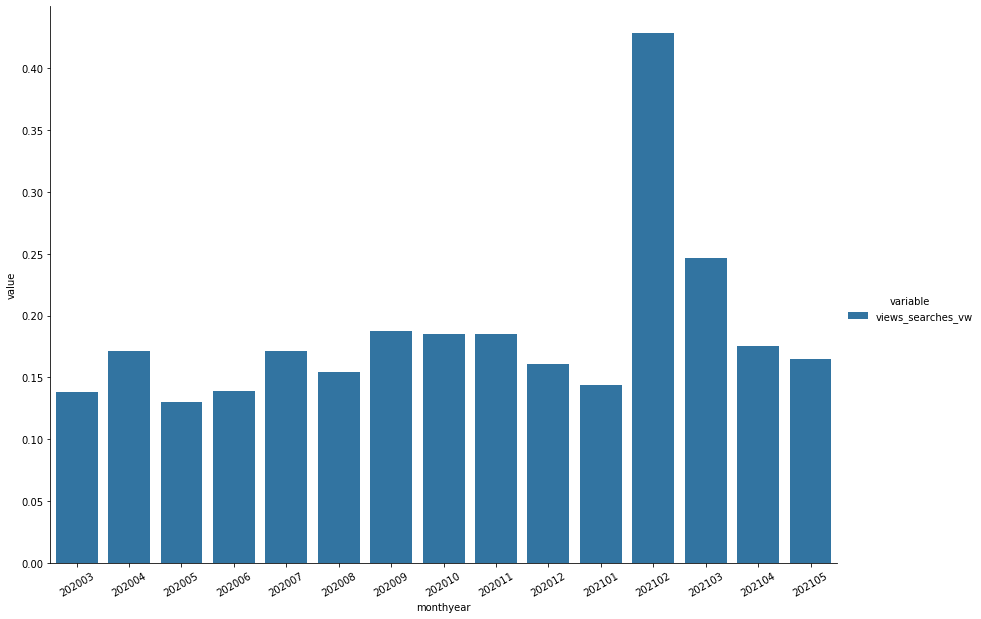

In [66]:
sns.catplot(data =pd.melt(mmm[[ 'views_searches_vw','monthyear']],['monthyear']), x = 'monthyear', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


In [126]:
dates = ['2019-10-01','2019-11-01','2019-12-01',
    '2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01',
         
    '2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
         '2021-04-01', '2021-05-01']
leads_vw = []
leads_vw_50000 = []
leads_vw_100000 = []
leads_vw_more100000 = []
inv_vw = []
inv_vw_50000 = []
inv_vw_100000 = []
inv_vw_more100000 = []
views_vw = []
views_vw_50000 = []
views_vw_100000 = []
views_vw_more100000 = []
for date in dates:
    h = df_m[(pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&
            (pd.to_datetime(df_m.date)<=pd.to_datetime(date)+timedelta(days=30))]
    h1 = df_[(pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))]
    leads_vw.append(h[(h.make_key=='vw')].leads_total.sum())
    leads_vw_50000.append(h[(h.make_key=='vw')&(h.mileage<50000)].leads_total.sum())
    leads_vw_100000.append(h[(h.make_key=='vw')&(h.mileage>=50000)&(h.mileage<100000)].leads_total.sum())
    leads_vw_more100000.append(h[(h.make_key=='vw')&(h.mileage>=100000)].leads_total.sum())
    views_vw.append(h[(h.make_key=='vw')].no_of_ga_unique_pdp_views.sum())
    views_vw_50000.append(h[(h.make_key=='vw')&(h.mileage<50000)].no_of_ga_unique_pdp_views.sum())
    views_vw_100000.append(h[(h.make_key=='vw')&(h.mileage>=50000)&(h.mileage<100000)].no_of_ga_unique_pdp_views.sum())
    views_vw_more100000.append(h[(h.make_key=='vw')&(h.mileage>=100000)].no_of_ga_unique_pdp_views.sum())
    inv_vw.append(h1[h1.make_key=='vw'].id.count())
    inv_vw_50000.append(h1[(h1.make_key=='vw')&(h1.mileage<50000)].id.count())
    inv_vw_100000.append(h1[(h1.make_key=='vw')&(h1.mileage>=50000)&(h1.mileage<100000)].id.count())
    inv_vw_more100000.append(h1[(h1.make_key=='vw')&(h1.mileage>=100000)].id.count())
                      


In [127]:
df_av = pd.DataFrame({'date':dates,'leads_vw':leads_vw, 
                     'leads_vw_50000': leads_vw_50000, 'leads_vw_100000': leads_vw_100000, 
                      'leads_vw_more100000':leads_vw_more100000,
                     'inv_vw':inv_vw,
                     'inv_vw_50000':inv_vw_50000,
                     'inv_vw_100000': inv_vw_100000,
                     'inv_vw_more100000': inv_vw_more100000,
                     'views_vw': views_vw,
                     'views_vw_50000': views_vw_50000,
                     'views_vw_100000': views_vw_100000,
                     'views_vw_more100000': views_vw_more100000})

In [128]:
df_av['leads_inv_vw'] = df_av.leads_vw / df_av.inv_vw
df_av['leads_inv_vw_50000'] = df_av.leads_vw_50000 / df_av.inv_vw_50000
df_av['leads_inv_vw_100000'] = df_av.leads_vw_100000 / df_av.inv_vw_100000
df_av['leads_inv_vw_more100000'] = df_av.leads_vw_more100000 / df_av.inv_vw_more100000
df_av['leads_views_vw'] = df_av.leads_vw / df_av.views_vw
df_av['leads_views_vw_50000'] = df_av.leads_vw_50000 / df_av.views_vw_50000
df_av['leads_views_vw_100000'] = df_av.leads_vw_100000 / df_av.views_vw_100000
df_av['leads_views_vw_more100000'] = df_av.leads_vw_more100000 / df_av.views_vw_more100000

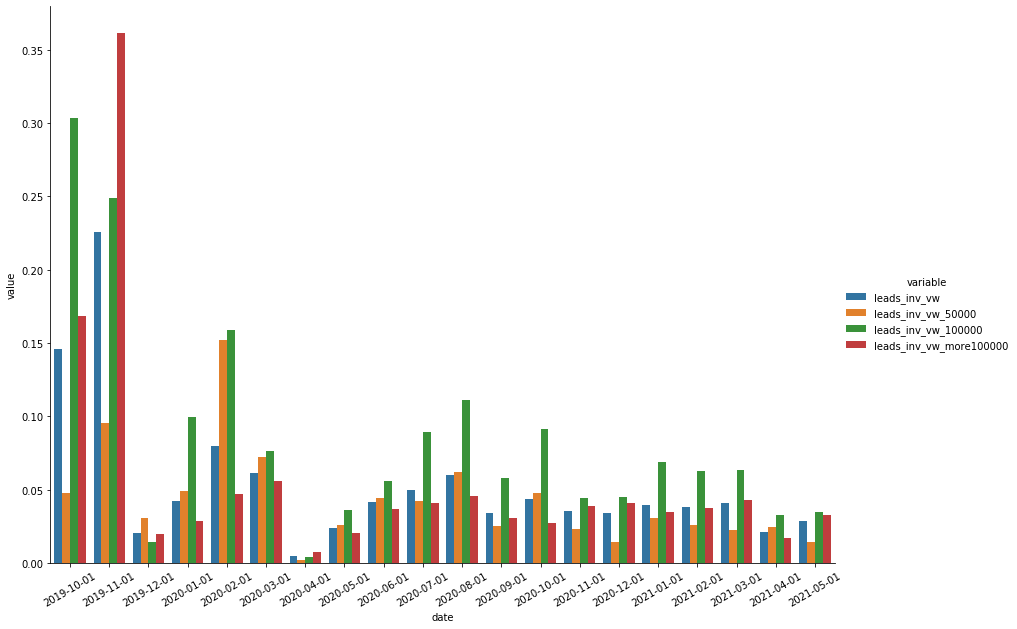

In [129]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_inv_vw','leads_inv_vw_50000', 'leads_inv_vw_100000',
                               'leads_inv_vw_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


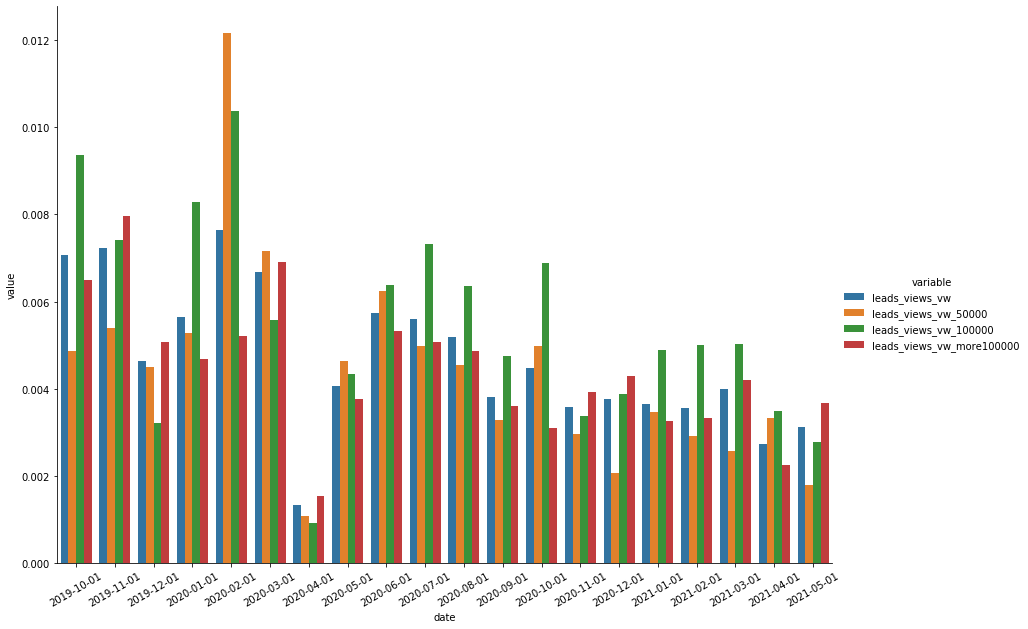

In [130]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_views_vw','leads_views_vw_50000', 'leads_views_vw_100000',
                               'leads_views_vw_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


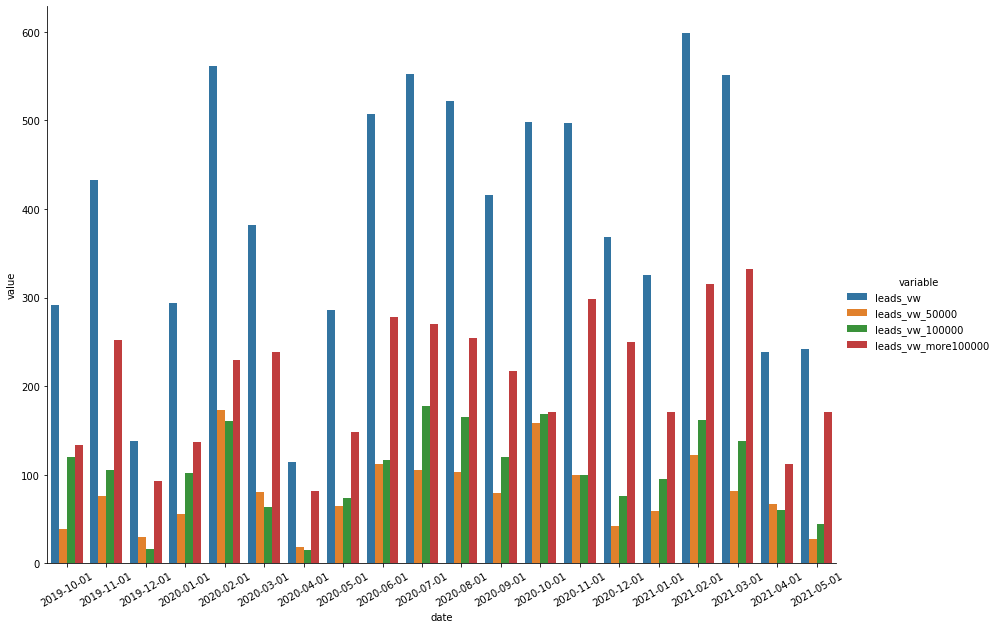

In [131]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_vw','leads_vw_50000', 'leads_vw_100000',
                               'leads_vw_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


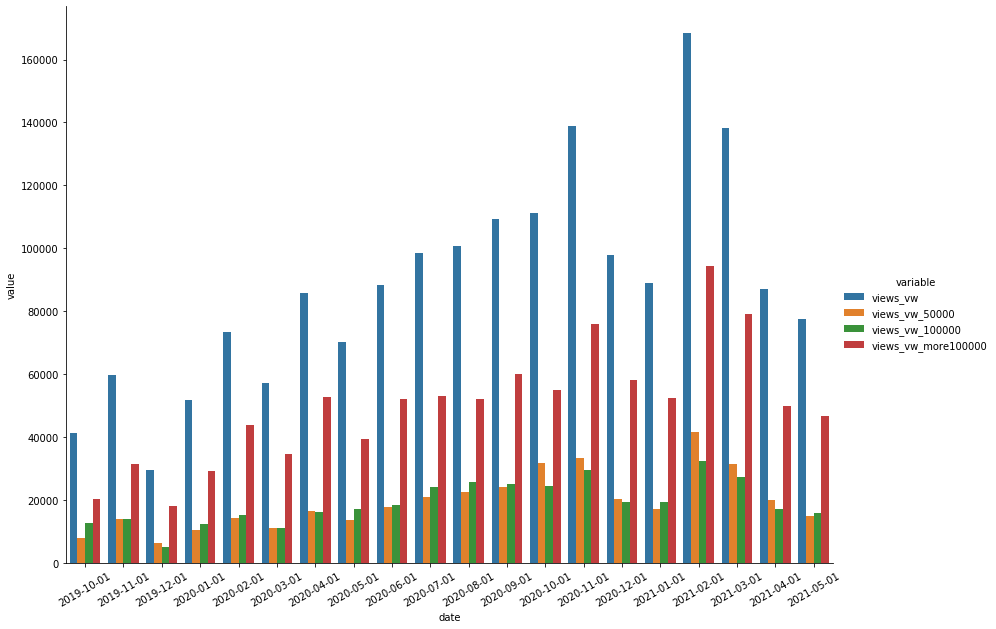

In [132]:
sns.catplot(data =pd.melt(df_av[['date', 'views_vw','views_vw_50000', 'views_vw_100000',
                               'views_vw_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


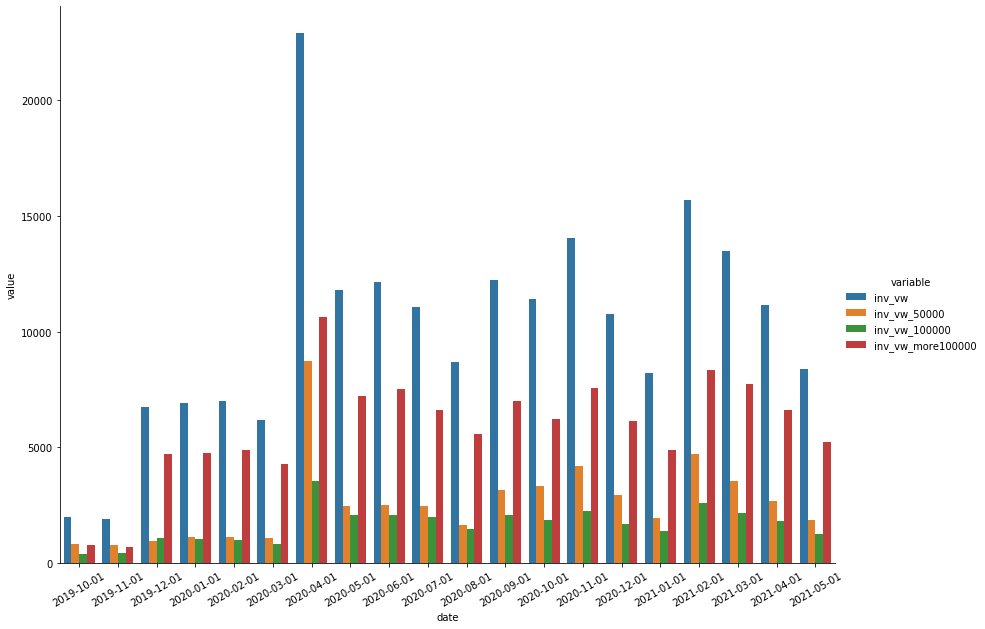

In [133]:
sns.catplot(data =pd.melt(df_av[['date', 'inv_vw','inv_vw_50000', 'inv_vw_100000',
                               'inv_vw_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


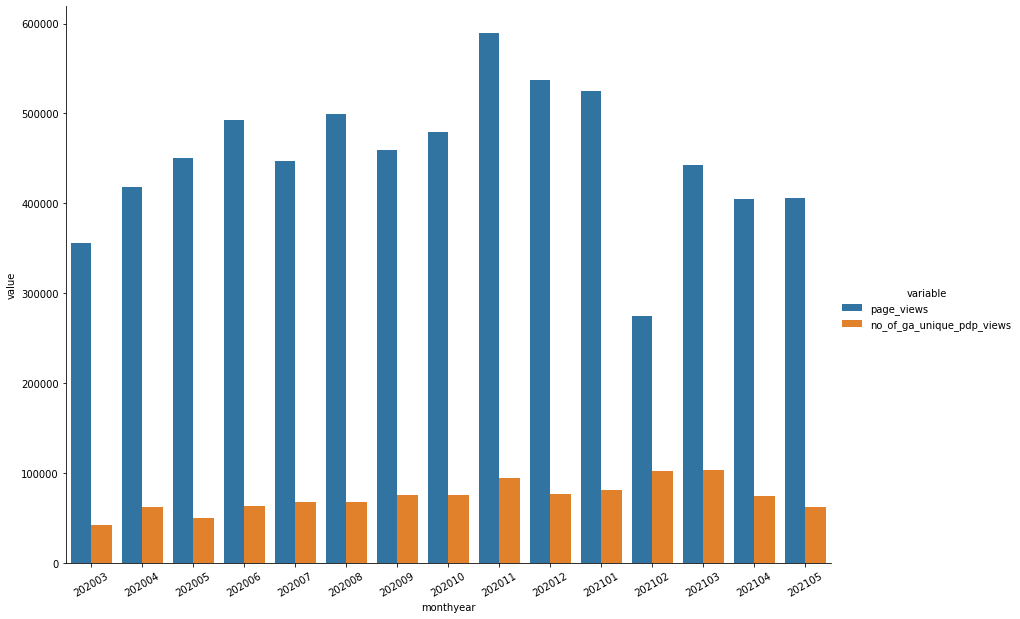

In [68]:
df_a_o = df_m[df_m.make_key=='bmw'].groupby(['action_year', 'action_month'])['leads_total', 'no_of_ga_unique_pdp_views'].sum().reset_index()
df_i_o = df_[df_.make_key=='bmw'].groupby(['created_year', 'created_month'])['id'].count().reset_index()
df_s_o = df_s[df_s.make=='bmw'].groupby(['year', 'month'])['page_views'].sum().reset_index()
mm = pd.merge(df_a_o, df_i_o, left_on=['action_year', 'action_month'], right_on=['created_year', 'created_month'])
mmm = pd.merge(mm, df_s_o, left_on=['action_year', 'action_month'], right_on=['year', 'month'])
mmm = mmm.drop(columns=['action_year', 'action_month', 'created_year', 'created_month'], axis = 1)
mmm['leads_inv_bmw'] = mmm.leads_total / mmm.id
mmm['leads_views_bmw'] = mmm.leads_total/ mmm.no_of_ga_unique_pdp_views
mmm['views_searches_bmw'] = mmm.no_of_ga_unique_pdp_views/mmm.page_views
mmm['monthyear'] = mmm.year + mmm.month
mmm = mmm.drop(columns=['year', 'month'], axis = 1)
sns.catplot(data =pd.melt(mmm[['page_views', 'no_of_ga_unique_pdp_views','monthyear']],['monthyear']), x = 'monthyear', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);



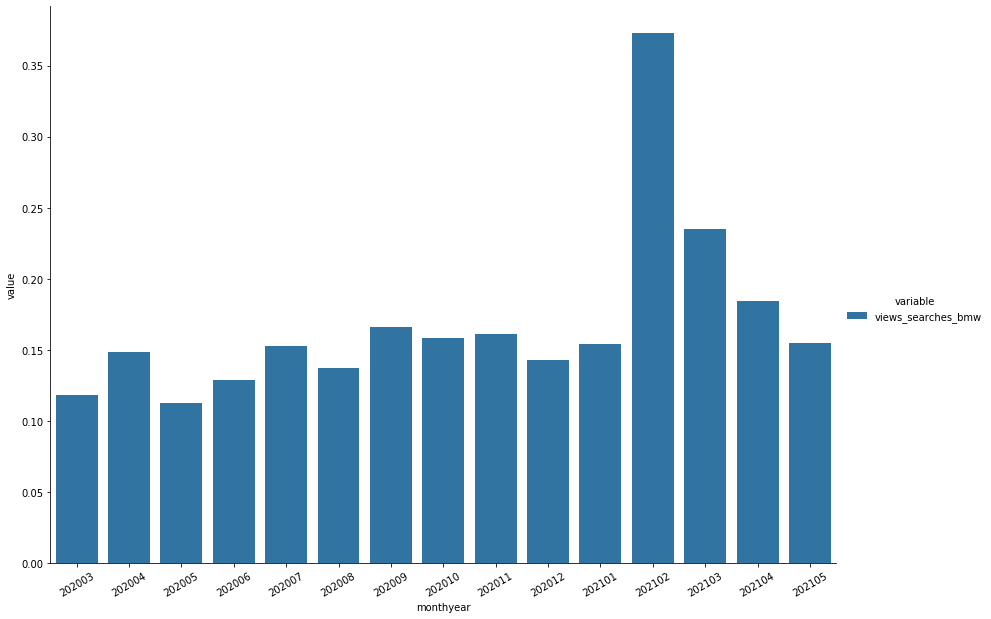

In [69]:
sns.catplot(data =pd.melt(mmm[[ 'views_searches_bmw','monthyear']],['monthyear']), x = 'monthyear', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


In [73]:
dates = ['2019-10-01','2019-11-01','2019-12-01',
    '2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01',
         
    '2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
         '2021-04-01', '2021-05-01']
leads_bmw = []
leads_bmw_50000 = []
leads_bmw_100000 = []
leads_bmw_more100000 = []
inv_bmw = []
inv_bmw_50000 = []
inv_bmw_100000 = []
inv_bmw_more100000 = []
views_bmw = []
views_bmw_50000 = []
views_bmw_100000 = []
views_bmw_more100000 = []
for date in dates:
    h = df_m[(pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&
            (pd.to_datetime(df_m.action_year)==pd.to_datetime(date)+timedelta(days=30))]
    h1 = df_[(pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))]
    leads_bmw.append(h[(h.make_key=='bmw')].leads_total.sum())
    leads_bmw_50000.append(h[(h.make_key=='bmw')&(h.mileage<50000)].leads_total.sum())
    leads_bmw_100000.append(h[(h.make_key=='bmw')&(h.mileage>=50000)&(h.mileage<100000)].leads_total.sum())
    leads_bmw_more100000.append(h[(h.make_key=='bmw')&(h.mileage>=100000)].leads_total.sum())
    views_bmw.append(h[(h.make_key=='bmw')].no_of_ga_unique_pdp_views.sum())
    views_bmw_50000.append(h[(h.make_key=='bmw')&(h.mileage<50000)].no_of_ga_unique_pdp_views.sum())
    views_bmw_100000.append(h[(h.make_key=='bmw')&(h.mileage>=50000)&(h.mileage<100000)].no_of_ga_unique_pdp_views.sum())
    views_bmw_more100000.append(h[(h.make_key=='bmw')&(h.mileage>=100000)].no_of_ga_unique_pdp_views.sum())
    inv_bmw.append(h1[h1.make_key=='bmw'].id.count())
    inv_bmw_50000.append(h1[(h1.make_key=='bmw')&(h1.mileage<50000)].id.count())
    inv_bmw_100000.append(h1[(h1.make_key=='bmw')&(h1.mileage>=50000)&(h1.mileage<100000)].id.count())
    inv_bmw_more100000.append(h1[(h1.make_key=='bmw')&(h1.mileage>=100000)].id.count())
                      


AttributeError: 'DataFrame' object has no attribute 'date'

In [135]:
df_av = pd.DataFrame({'date':dates,'leads_bmw':leads_bmw, 
                     'leads_bmw_50000': leads_bmw_50000, 'leads_bmw_100000': leads_bmw_100000, 
                      'leads_bmw_more100000':leads_bmw_more100000,
                     'inv_bmw':inv_bmw,
                     'inv_bmw_50000':inv_bmw_50000,
                     'inv_bmw_100000': inv_bmw_100000,
                     'inv_bmw_more100000': inv_bmw_more100000,
                     'views_bmw': views_bmw,
                     'views_bmw_50000': views_bmw_50000,
                     'views_bmw_100000': views_bmw_100000,
                     'views_bmw_more100000': views_bmw_more100000})

In [136]:
df_av['leads_inv_bmw'] = df_av.leads_bmw / df_av.inv_bmw
df_av['leads_inv_bmw_50000'] = df_av.leads_bmw_50000 / df_av.inv_bmw_50000
df_av['leads_inv_bmw_100000'] = df_av.leads_bmw_100000 / df_av.inv_bmw_100000
df_av['leads_inv_bmw_more100000'] = df_av.leads_bmw_more100000 / df_av.inv_bmw_more100000
df_av['leads_views_bmw'] = df_av.leads_bmw / df_av.views_bmw
df_av['leads_views_bmw_50000'] = df_av.leads_bmw_50000 / df_av.views_bmw_50000
df_av['leads_views_bmw_100000'] = df_av.leads_bmw_100000 / df_av.views_bmw_100000
df_av['leads_views_bmw_more100000'] = df_av.leads_bmw_more100000 / df_av.views_bmw_more100000

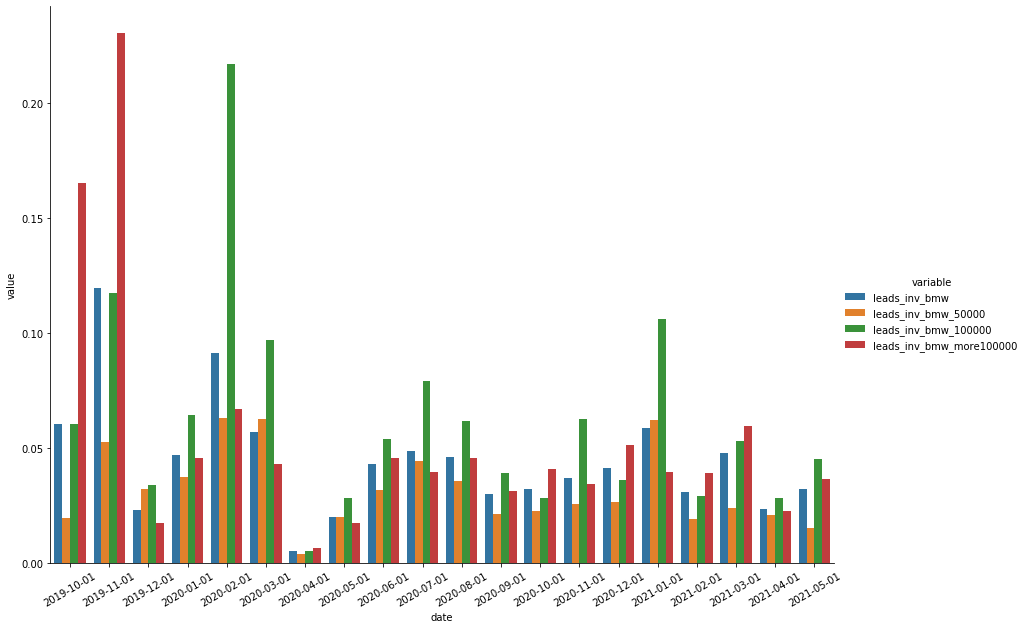

In [137]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_inv_bmw','leads_inv_bmw_50000', 'leads_inv_bmw_100000',
                               'leads_inv_bmw_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


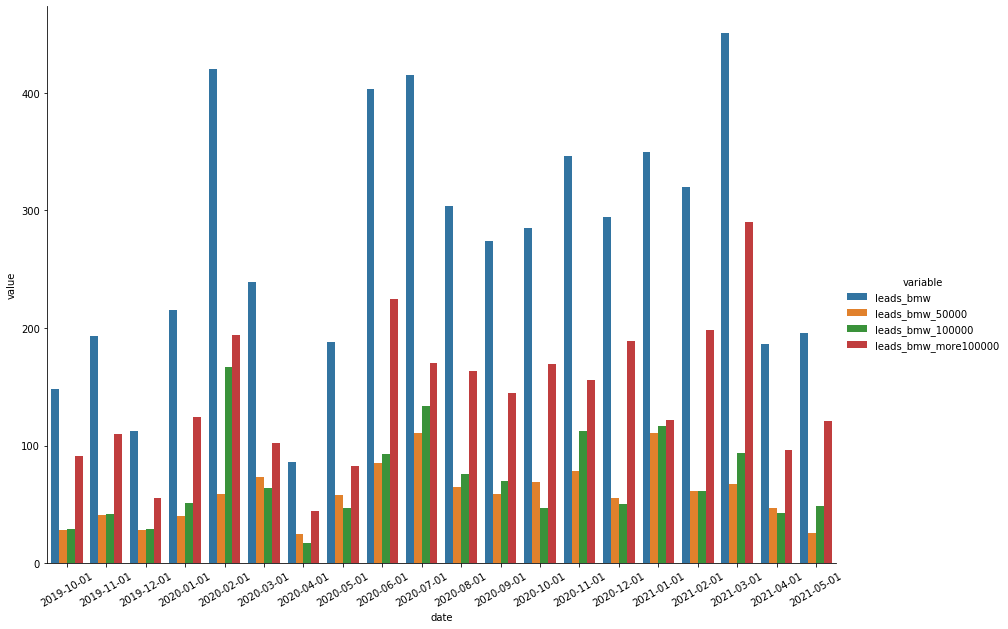

In [138]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_bmw','leads_bmw_50000', 'leads_bmw_100000',
                               'leads_bmw_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


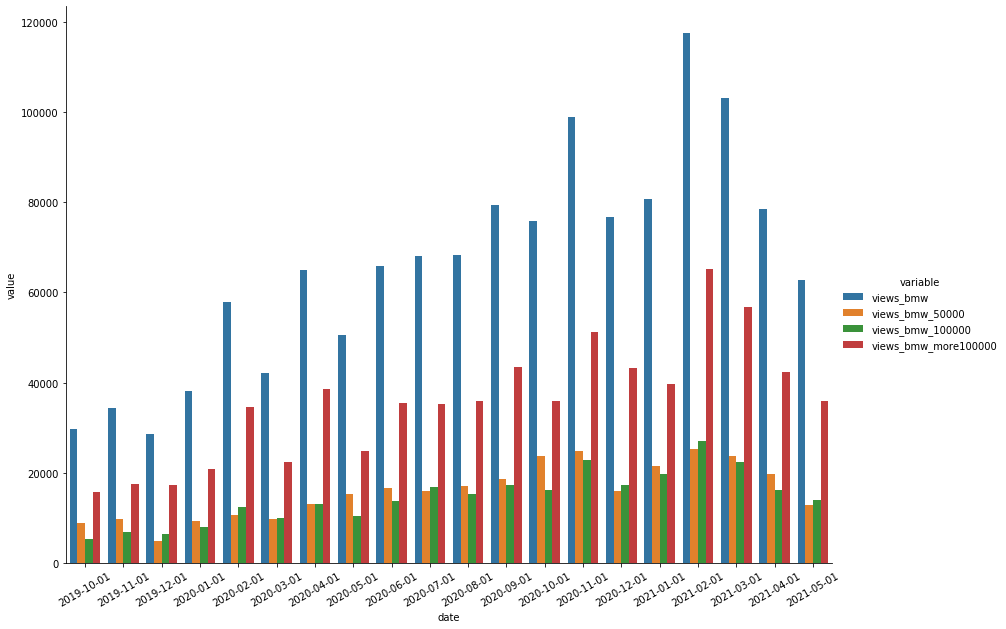

In [139]:
sns.catplot(data =pd.melt(df_av[['date', 'views_bmw','views_bmw_50000', 'views_bmw_100000',
                               'views_bmw_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


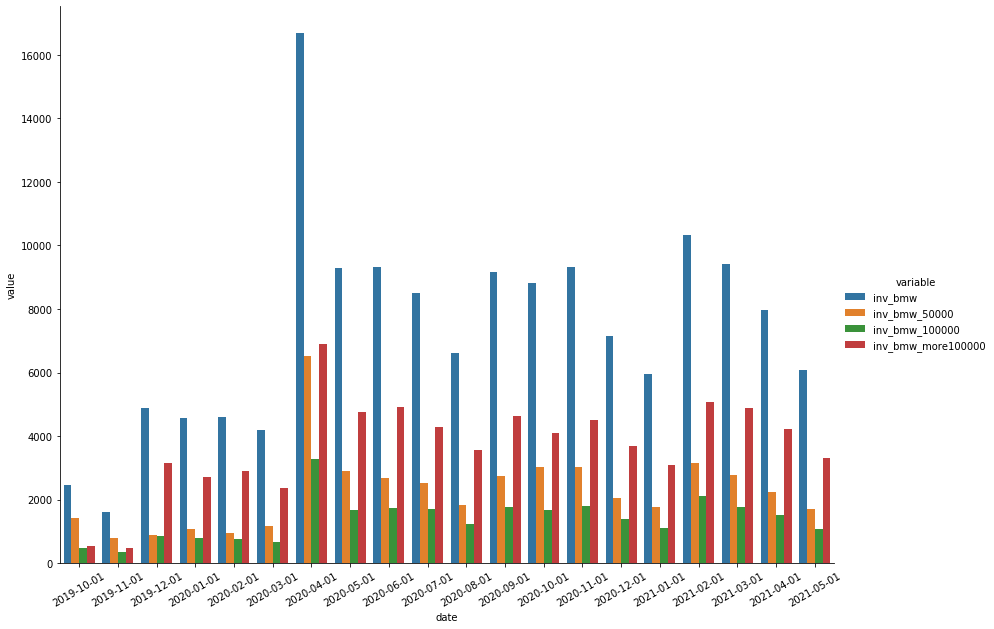

In [140]:
sns.catplot(data =pd.melt(df_av[['date', 'inv_bmw','inv_bmw_50000', 'inv_bmw_100000',
                               'inv_bmw_more100000' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


In [141]:
dates = ['2019-10-01','2019-11-01','2019-12-01',
    '2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01',
         
    '2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
         '2021-04-01', '2021-05-01']
leads_electric = []
leads_petrol = []
leads_diesel = []
inv_electric = []
inv_petrol = []
inv_diesel = []
views_electric = []
views_petrol = []
views_diesel = []

for date in dates:
    h = df_m[(pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&
            (pd.to_datetime(df_m.date)<=pd.to_datetime(date)+timedelta(days=30))]
    h1 = df_[(pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))]
   
    leads_electric.append(h[(h.fuel_type=='electric')].leads_total.sum())
    leads_petrol.append(h[(h.fuel_type=='petrol')].leads_total.sum())
    leads_diesel.append(h[(h.fuel_type=='diesel')].leads_total.sum())
    inv_electric.append(h1[(h1.fuel_type=='electric')].id.count())
    inv_petrol.append(h1[(h1.fuel_type=='petrol')].id.count())
    inv_diesel.append(h1[(h1.fuel_type=='diesel')].id.count())
    views_electric.append(h[(h.fuel_type=='electric')].no_of_ga_unique_pdp_views.sum())
    views_diesel.append(h[(h.fuel_type=='diesel')].no_of_ga_unique_pdp_views.sum())
    views_petrol.append(h[(h.fuel_type=='petrol')].no_of_ga_unique_pdp_views.sum())
df_av = pd.DataFrame({'date':dates, 'leads_electric': leads_electric,
                     'leads_petrol': leads_petrol, 
                      'leads_diesel':leads_diesel,
                     'inv_electric': inv_electric,
                     'inv_petrol': inv_petrol,
                     'inv_diesel': inv_diesel,
                     'views_electric': views_electric,
                     'views_petrol': views_petrol,
                     'views_diesel': views_diesel})

In [142]:
df_av['leads_inv_electric'] = df_av.leads_electric / df_av.inv_electric
df_av['leads_inv_petrol'] = df_av.leads_petrol / df_av.inv_petrol
df_av['leads_inv_diesel'] = df_av.leads_diesel / df_av.inv_diesel
df_av['leads_views_electric'] = df_av.leads_electric / df_av.views_electric
df_av['leads_views_petrol'] = df_av.leads_petrol / df_av.views_petrol
df_av['leads_views_diesel'] = df_av.leads_diesel / df_av.views_diesel

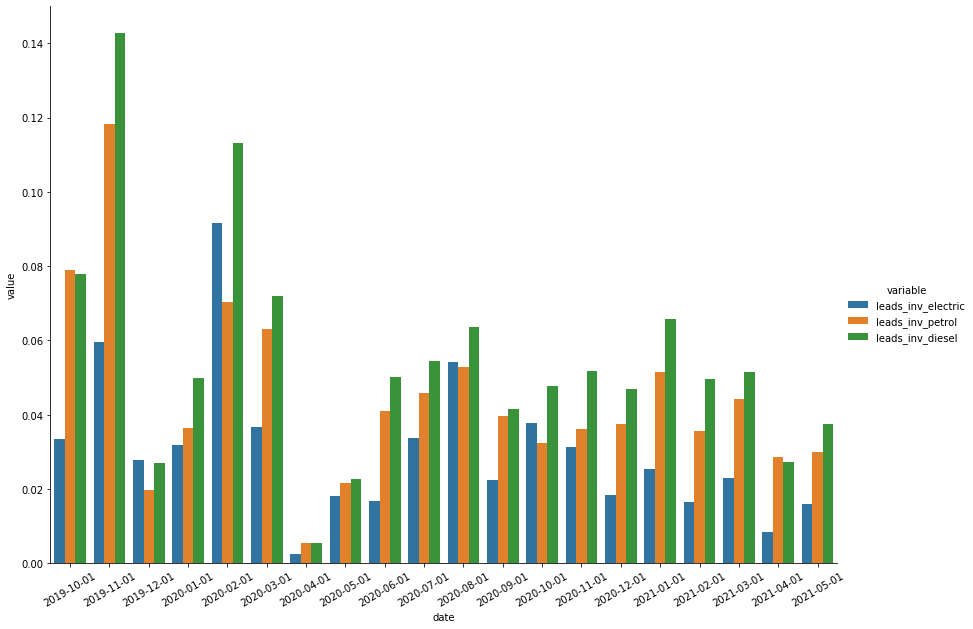

In [143]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_inv_electric','leads_inv_petrol', 'leads_inv_diesel' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


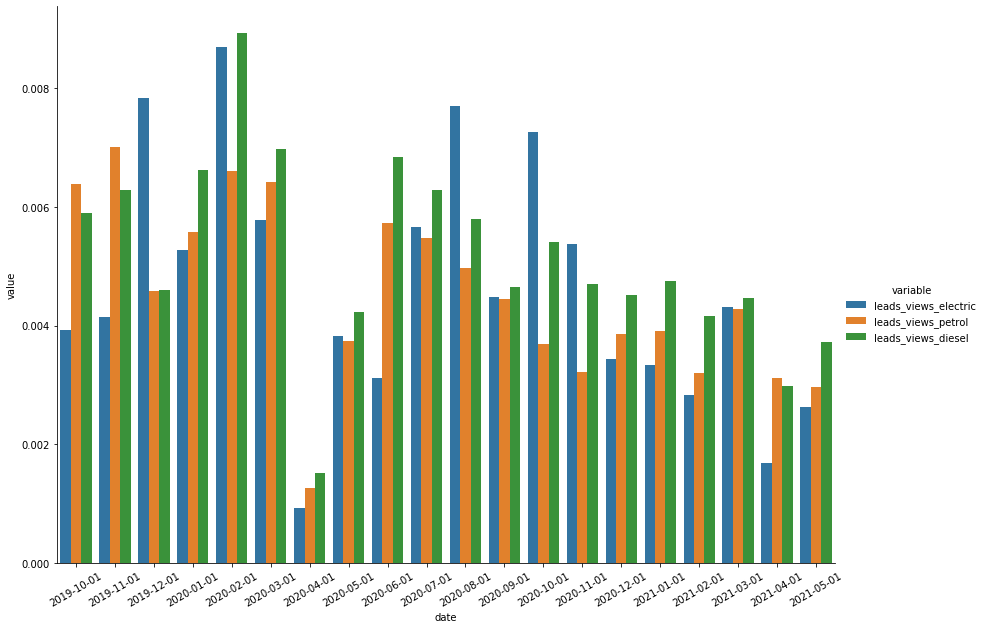

In [144]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_views_electric','leads_views_petrol', 'leads_views_diesel' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


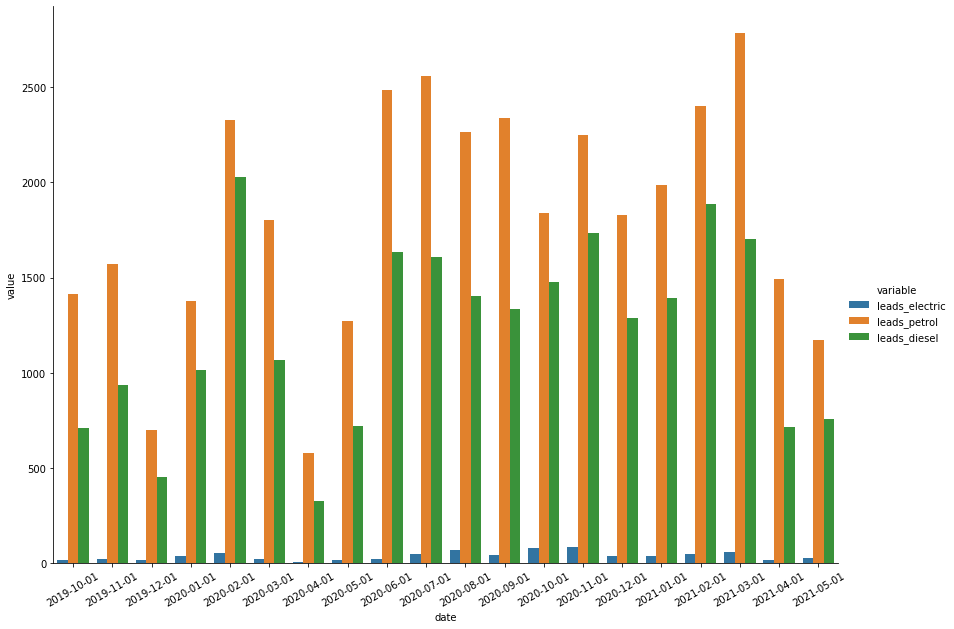

In [145]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_electric','leads_petrol', 'leads_diesel' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


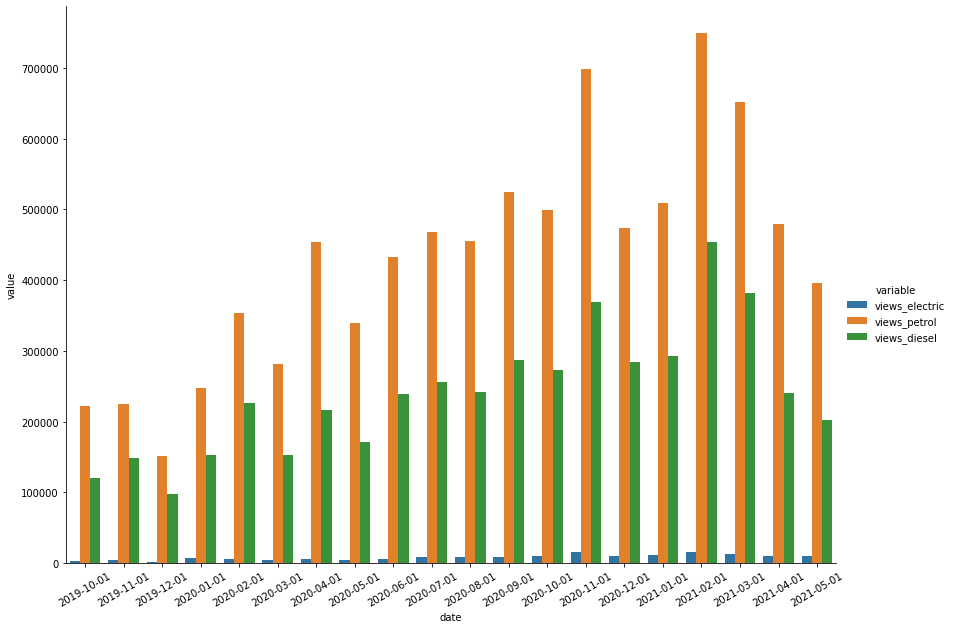

In [146]:
sns.catplot(data =pd.melt(df_av[['date', 'views_electric','views_petrol', 'views_diesel' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


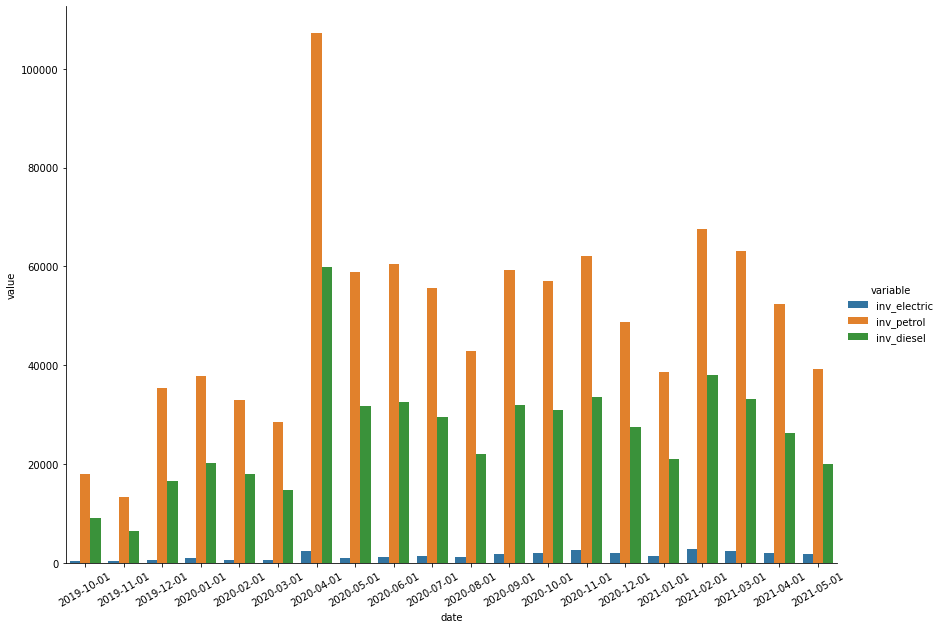

In [147]:
sns.catplot(data =pd.melt(df_av[['date', 'inv_electric','inv_petrol', 'inv_diesel' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


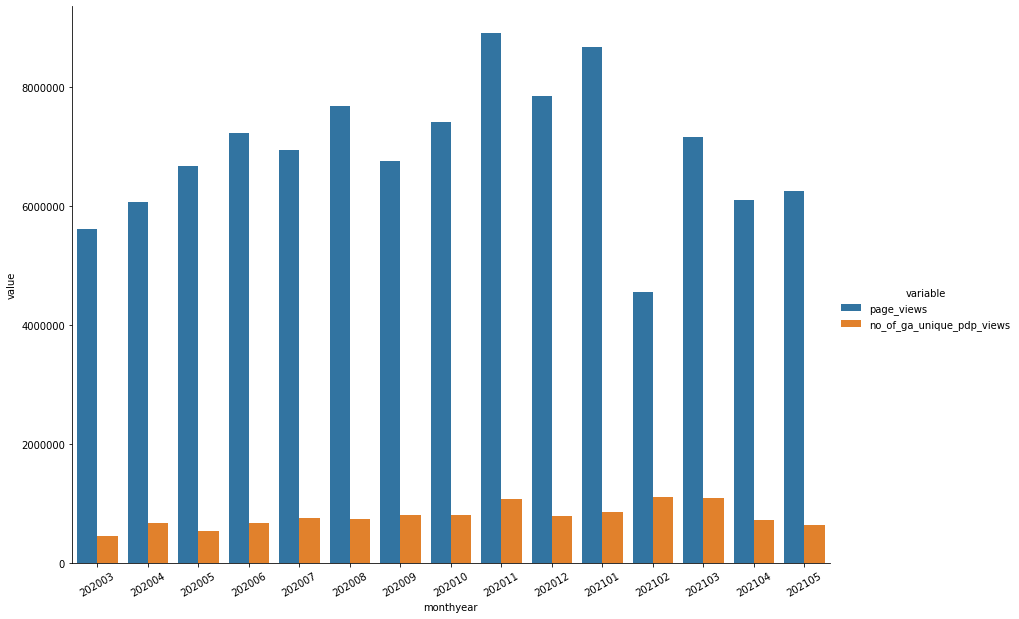

In [71]:
df_a_o = df_m.groupby(['action_year', 'action_month'])['leads_total', 'no_of_ga_unique_pdp_views'].sum().reset_index()
df_i_o = df_.groupby(['created_year', 'created_month'])['id'].count().reset_index()
df_s_o = df_s.groupby(['year', 'month'])['page_views'].sum().reset_index()
mm = pd.merge(df_a_o, df_i_o, left_on=['action_year', 'action_month'], right_on=['created_year', 'created_month'])
mmm = pd.merge(mm, df_s_o, left_on=['action_year', 'action_month'], right_on=['year', 'month'])
mmm = mmm.drop(columns=['action_year', 'action_month', 'created_year', 'created_month'], axis = 1)
mmm['leads_inv'] = mmm.leads_total / mmm.id
mmm['leads_views'] = mmm.leads_total/ mmm.no_of_ga_unique_pdp_views
mmm['views_searches'] = mmm.no_of_ga_unique_pdp_views/mmm.page_views
mmm['monthyear'] = mmm.year + mmm.month
mmm = mmm.drop(columns=['year', 'month'], axis = 1)
sns.catplot(data =pd.melt(mmm[['page_views', 'no_of_ga_unique_pdp_views','monthyear']],['monthyear']), x = 'monthyear', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);



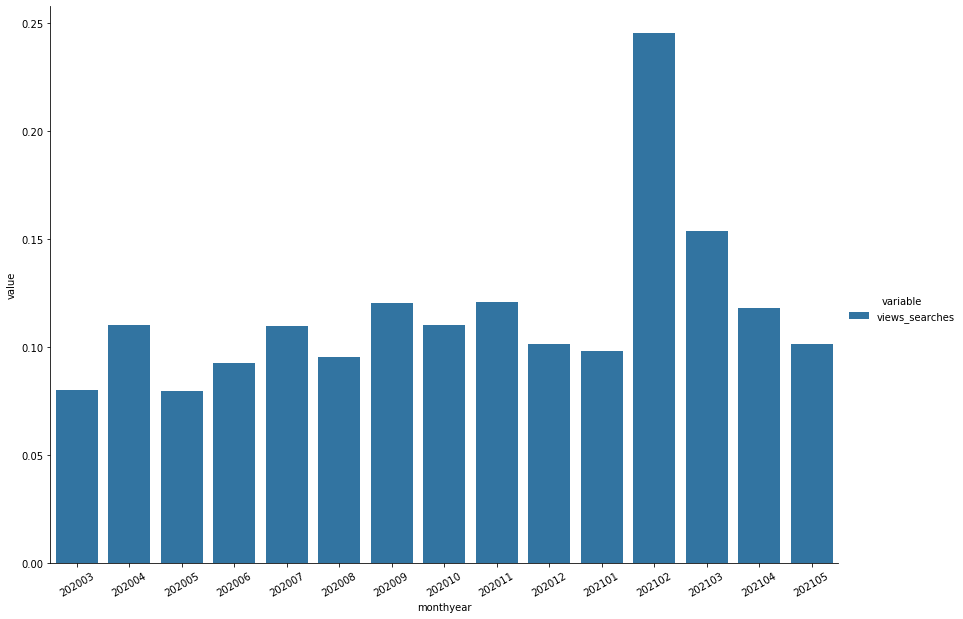

In [72]:
sns.catplot(data =pd.melt(mmm[[ 'views_searches','monthyear']],['monthyear']), x = 'monthyear', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


In [148]:
dates = ['2019-10-01','2019-11-01','2019-12-01',
    '2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01',
         
    '2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
         '2021-04-01', '2021-05-01']
leads = []
inv = []
views = []


for date in dates:
    h = df_m[(pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&
            (pd.to_datetime(df_m.date)<=pd.to_datetime(date)+timedelta(days=30))]
    h1 = df_[(pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))]
    leads.append(h.leads_total.sum())
    inv.append(h1.id.count())
    views.append(h.no_of_ga_unique_pdp_views.sum())
    
df_av = pd.DataFrame({'date':dates, 'leads': leads,
                     'inv': inv,
                     'views': views})

In [149]:
df_av['leads_inv'] = df_av.leads / df_av.inv
df_av['leads_views'] = df_av.leads / df_av.views

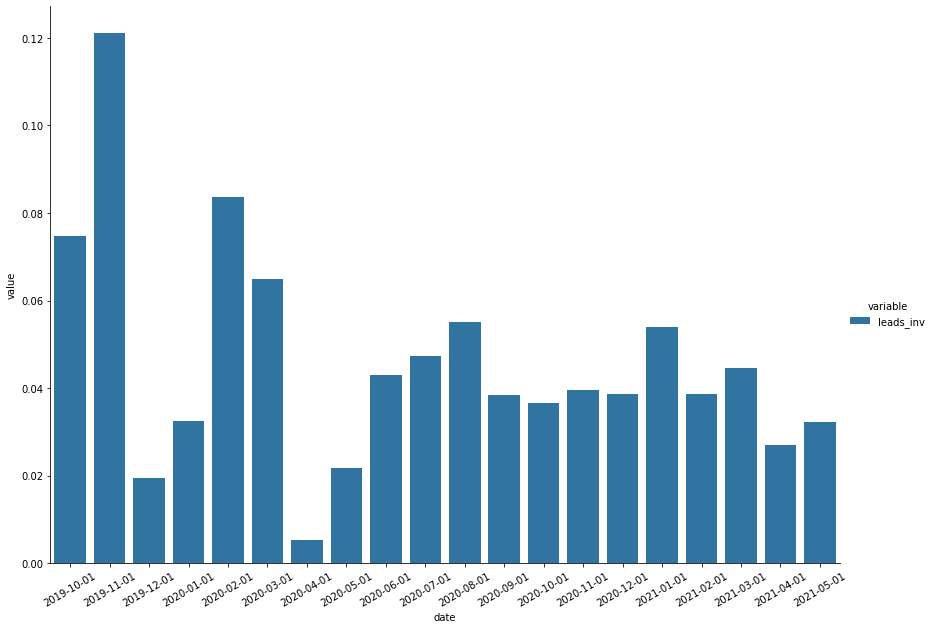

In [151]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_inv' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


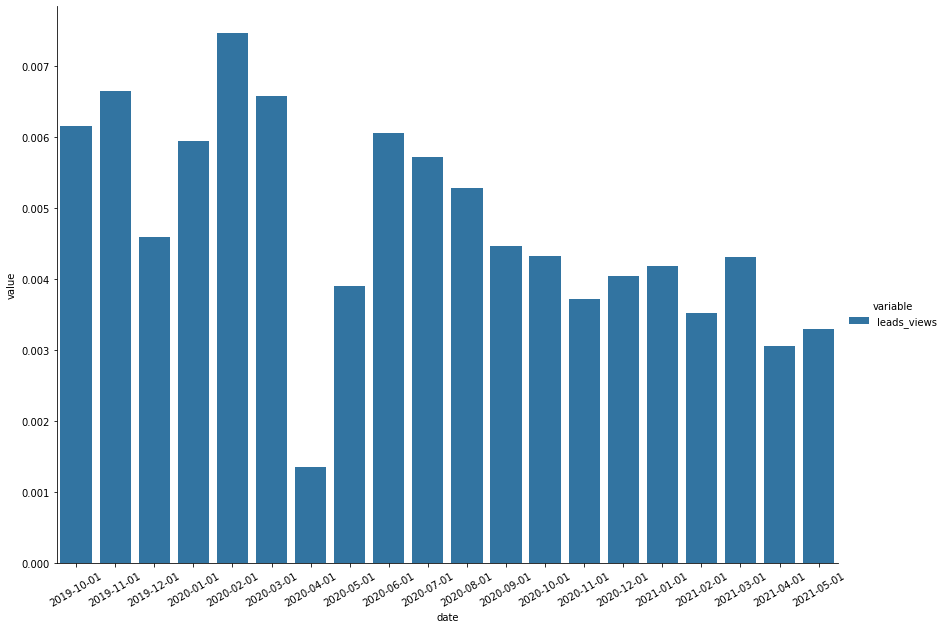

In [155]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_views' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


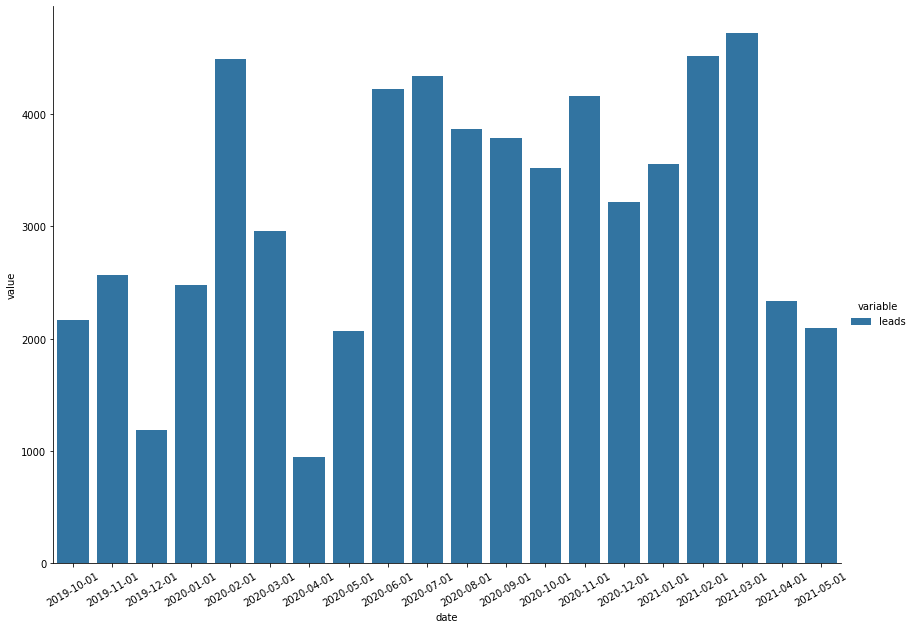

In [152]:
sns.catplot(data =pd.melt(df_av[['date', 'leads']], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


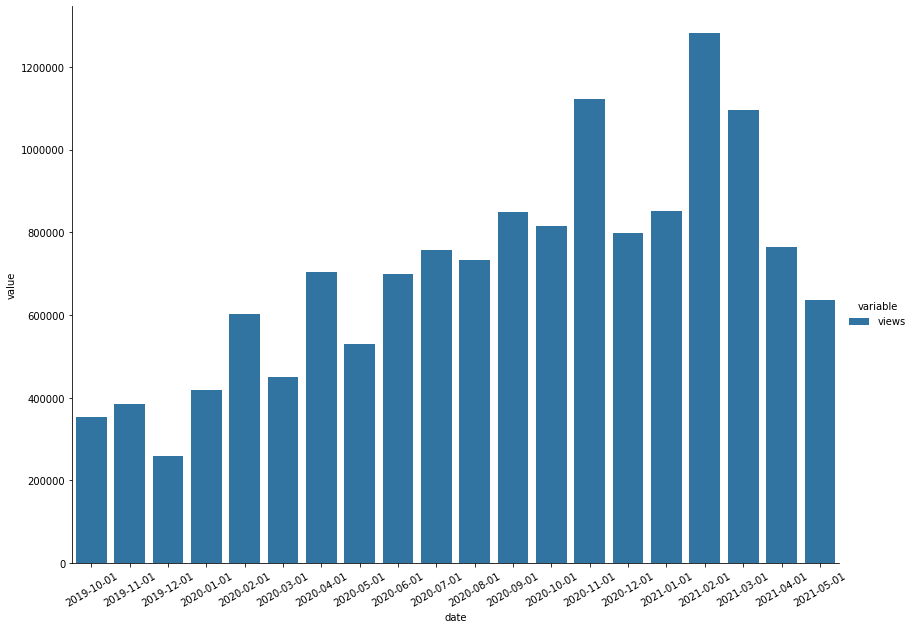

In [153]:
sns.catplot(data =pd.melt(df_av[['date', 'views' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


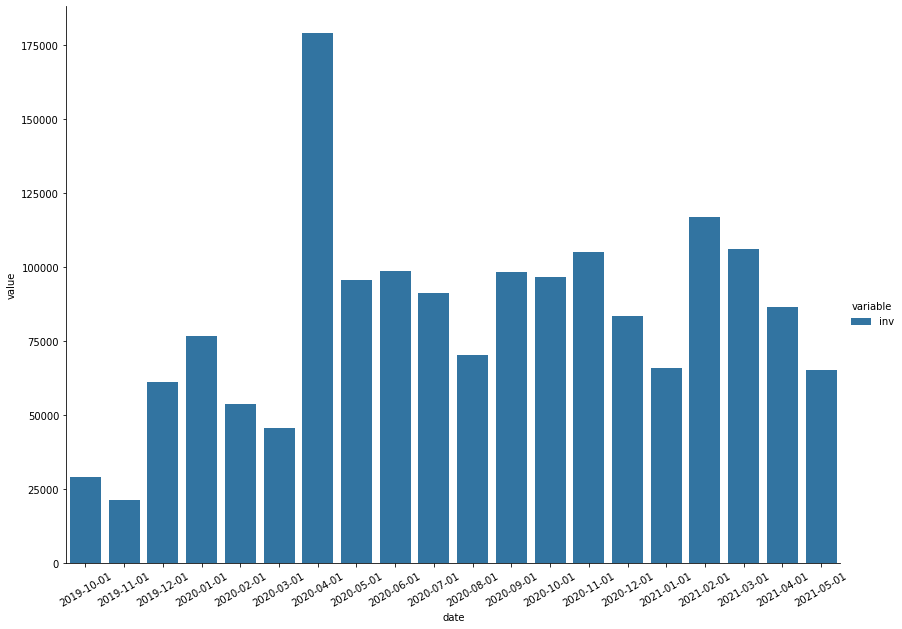

In [154]:
sns.catplot(data =pd.melt(df_av[['date', 'inv' ]], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);
